In [1]:
### 한글 폰트 설정
import matplotlib
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import platform
import numpy as np
from scipy import stats
import os, warnings
warnings.filterwarnings(action='ignore')

path = "C:/Windows/Fonts/malgun.ttf"
if platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system()=="Darwin":
    rc('font', family='AppleGothic')
else:
    print("Unknown System")
    
matplotlib.rcParams['axes.unicode_minus'] = False

%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [3]:
import pandas as pd

train = pd.read_csv("data/train_df_jm.csv")
test = pd.read_csv("data/test_df_jm.csv")
sub = pd.read_csv("data/sample_submission.csv")
age = pd.read_csv("data/age_gender_info.csv")
train.shape, test.shape, sub.shape, age.shape

((2869, 15), (1008, 14), (150, 2), (16, 23))

In [4]:
train.columns

Index(['단지코드', '총세대수', '임대건물구분', '지역', '공급유형', '전용면적', '전용면적별세대수', '공가수',
       '자격유형', '임대보증금', '임대료', '도보 10분거리 내 지하철역 수(환승노선 수 반영)',
       '도보 10분거리 내 버스정류장 수', '단지내주차면수', '등록차량수'],
      dtype='object')

In [5]:
train.head(30)

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
0,C2515,545,아파트,경상남도,국민임대,33.48,276,17.0,A,9216000,82940,0.0,3.0,624.0,205.0
1,C2515,545,아파트,경상남도,국민임대,39.60,60,17.0,A,12672000,107130,0.0,3.0,624.0,205.0
2,C2515,545,아파트,경상남도,국민임대,39.60,20,17.0,A,12672000,107130,0.0,3.0,624.0,205.0
3,C2515,545,아파트,경상남도,국민임대,46.90,38,17.0,A,18433000,149760,0.0,3.0,624.0,205.0
4,C2515,545,아파트,경상남도,국민임대,46.90,19,17.0,A,18433000,149760,0.0,3.0,624.0,205.0
5,C2515,545,아파트,경상남도,국민임대,51.97,106,17.0,A,23042000,190090,0.0,3.0,624.0,205.0
6,C2515,545,아파트,경상남도,국민임대,51.97,26,17.0,A,23042000,190090,0.0,3.0,624.0,205.0
7,C1407,1216,아파트,대전광역시,국민임대,30.95,288,13.0,A,15620000,127350,1.0,1.0,1285.0,1064.0
8,C1407,1216,아파트,대전광역시,국민임대,30.99,68,13.0,A,15620000,127350,1.0,1.0,1285.0,1064.0
9,C1407,1216,아파트,대전광역시,국민임대,30.99,34,13.0,A,15620000,127350,1.0,1.0,1285.0,1064.0


In [6]:
train.columns = ['단지코드', '총세대수', '임대건물구분', '지역', '공급유형', '전용면적', '전용면적별세대수', '공가수',
       '자격유형', '임대보증금', '임대료', '10분내지하철수', '10분내버스정류장수', '단지내주차면수', '등록차량수']

test.columns = ['단지코드', '총세대수', '임대건물구분', '지역', '공급유형', '전용면적', '전용면적별세대수', '공가수',
       '자격유형', '임대보증금', '임대료', '10분내지하철수', '10분내버스정류장수', '단지내주차면수']

## Age 정보 추가

In [7]:
train.shape, test.shape

((2869, 15), (1008, 14))

In [8]:
train = pd.merge(train,age)
test = pd.merge(test,age)

In [9]:
train.shape, test.shape

((2869, 37), (1008, 36))

In [10]:
len(test['단지코드'].unique())

147

((array([-3.48993426, -3.24543014, -3.11017715, ...,  3.11017715,
          3.24543014,  3.48993426]),
  array([2.56494936, 2.56494936, 2.56494936, ..., 7.84384864, 7.84384864,
         7.84384864])),
 (0.8805142620262187, 5.974051234508852, 0.9839921058038086))

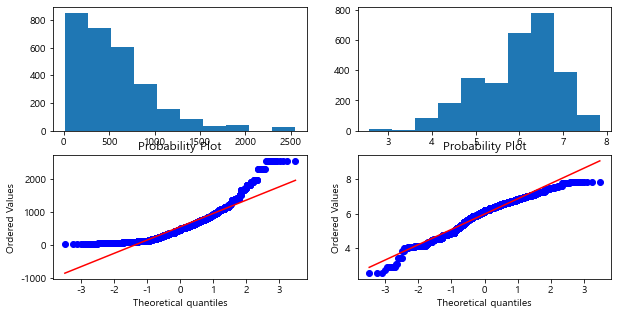

In [11]:

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,5))
ax[0][0].hist(train['등록차량수'])
ax[0][1].hist(np.log(train['등록차량수']))

stats.probplot(train['등록차량수'], plot=ax[1][0])
stats.probplot(np.log(train['등록차량수']), plot=ax[1][1])

In [12]:
all_df = pd.concat([train, test], join='inner', ignore_index=True) #기존 인덱스 겹쳐지지 않게 만들어준다
all_df
all_df.shape

(3877, 36)

In [13]:
all_df.shape

(3877, 36)

## 결측치 처리

### 자격유형

In [14]:
all_df.isnull().sum()

단지코드            0
총세대수            0
임대건물구분          0
지역              0
공급유형            0
전용면적            0
전용면적별세대수        0
공가수             0
자격유형            2
임대보증금         749
임대료           749
10분내지하철수      245
10분내버스정류장수      0
단지내주차면수         0
10대미만(여자)       0
10대미만(남자)       0
10대(여자)         0
10대(남자)         0
20대(여자)         0
20대(남자)         0
30대(여자)         0
30대(남자)         0
40대(여자)         0
40대(남자)         0
50대(여자)         0
50대(남자)         0
60대(여자)         0
60대(남자)         0
70대(여자)         0
70대(남자)         0
80대(여자)         0
80대(남자)         0
90대(여자)         0
90대(남자)         0
100대(여자)        0
100대(남자)        0
dtype: int64

In [15]:
all_df.loc[all_df['자격유형'].isnull()]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,...,60대(여자),60대(남자),70대(여자),70대(남자),80대(여자),80대(남자),90대(여자),90대(남자),100대(여자),100대(남자)
3259,C2411,962,아파트,경상남도,국민임대,46.90,240,25.0,NaN,71950000,...,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.004910,0.001086,0.000179,0.000010
3454,C2253,1161,아파트,강원도,영구임대,26.37,745,0.0,NaN,2249000,...,0.088423,0.070014,0.047732,0.032760,0.033515,0.013027,0.007628,0.001677,0.000319,0.000017


In [16]:
grouped = all_df.groupby(['단지코드', '임대건물구분', '지역','공급유형'])
group1 = grouped.get_group( ('C2411', '아파트', '경상남도', '국민임대')  )
group1

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,...,60대(여자),60대(남자),70대(여자),70대(남자),80대(여자),80대(남자),90대(여자),90대(남자),100대(여자),100대(남자)
3256,C2411,962,아파트,경상남도,국민임대,39.43,56,25.0,A,11992000,...,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.00491,0.001086,0.000179,0.00001
3257,C2411,962,아파트,경상남도,국민임대,39.72,336,25.0,A,11992000,...,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.00491,0.001086,0.000179,0.00001
3258,C2411,962,아파트,경상남도,국민임대,39.82,179,25.0,A,11992000,...,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.00491,0.001086,0.000179,0.00001
3259,C2411,962,아파트,경상남도,국민임대,46.90,240,25.0,NaN,71950000,...,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.00491,0.001086,0.000179,0.00001
3260,C2411,962,아파트,경상남도,국민임대,51.93,150,25.0,A,21586000,...,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.00491,0.001086,0.000179,0.00001


In [17]:
group2 = grouped.get_group( ('C2253', '아파트', '강원도', '영구임대')  )
group2

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,...,60대(여자),60대(남자),70대(여자),70대(남자),80대(여자),80대(남자),90대(여자),90대(남자),100대(여자),100대(남자)
3454,C2253,1161,아파트,강원도,영구임대,26.37,745,0.0,NaN,2249000,...,0.088423,0.070014,0.047732,0.03276,0.033515,0.013027,0.007628,0.001677,0.000319,0.000017
3455,C2253,1161,아파트,강원도,영구임대,31.32,239,0.0,C,3731000,...,0.088423,0.070014,0.047732,0.03276,0.033515,0.013027,0.007628,0.001677,0.000319,0.000017
3456,C2253,1161,아파트,강원도,영구임대,31.32,149,0.0,C,3731000,...,0.088423,0.070014,0.047732,0.03276,0.033515,0.013027,0.007628,0.001677,0.000319,0.000017


In [18]:
all_df.loc[ 3259, "자격유형"] = 'A'
all_df.loc[ 3454, "자격유형"] = 'C'

In [19]:
all_df.isnull().sum()

단지코드            0
총세대수            0
임대건물구분          0
지역              0
공급유형            0
전용면적            0
전용면적별세대수        0
공가수             0
자격유형            0
임대보증금         749
임대료           749
10분내지하철수      245
10분내버스정류장수      0
단지내주차면수         0
10대미만(여자)       0
10대미만(남자)       0
10대(여자)         0
10대(남자)         0
20대(여자)         0
20대(남자)         0
30대(여자)         0
30대(남자)         0
40대(여자)         0
40대(남자)         0
50대(여자)         0
50대(남자)         0
60대(여자)         0
60대(남자)         0
70대(여자)         0
70대(남자)         0
80대(여자)         0
80대(남자)         0
90대(여자)         0
90대(남자)         0
100대(여자)        0
100대(남자)        0
dtype: int64

### 임대보증금

In [20]:
print(all_df[all_df['임대보증금']=='-'].shape)
# - 값 0으로 바꾸기
all_df.loc[all_df['임대보증금']=='-','임대보증금'] = 0
print('변경후')
print(all_df[all_df['임대보증금']=='-'].shape)

(18, 36)
변경후
(0, 36)


In [21]:
#일단 Nan 0으로 처리
print(all_df['임대보증금'].isnull().sum())
all_df['임대보증금'] = all_df['임대보증금'].fillna(0)
print('변경후')
print(all_df['임대보증금'].isnull().sum())

749
변경후
0


### 임대료

In [22]:
print(all_df[all_df['임대료']=='-'].shape)
# - 값 0으로 바꾸기
all_df.loc[all_df['임대료']=='-','임대료'] = 0
print('변경후')
print(all_df[all_df['임대료']=='-'].shape)

(21, 36)
변경후
(0, 36)


In [23]:
#일단 Nan 0으로 처리
print(all_df['임대료'].isnull().sum())
all_df['임대료'] = all_df['임대료'].fillna(0)
print('변경후')
print(all_df['임대료'].isnull().sum())

749
변경후
0


In [24]:
all_df['임대료'] = all_df['임대료'].astype(int)
all_df['임대보증금'] = all_df['임대보증금'].astype(int)

In [25]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3877 entries, 0 to 3876
Data columns (total 36 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   단지코드        3877 non-null   object 
 1   총세대수        3877 non-null   int64  
 2   임대건물구분      3877 non-null   object 
 3   지역          3877 non-null   object 
 4   공급유형        3877 non-null   object 
 5   전용면적        3877 non-null   float64
 6   전용면적별세대수    3877 non-null   int64  
 7   공가수         3877 non-null   float64
 8   자격유형        3877 non-null   object 
 9   임대보증금       3877 non-null   int32  
 10  임대료         3877 non-null   int32  
 11  10분내지하철수    3632 non-null   float64
 12  10분내버스정류장수  3877 non-null   float64
 13  단지내주차면수     3877 non-null   float64
 14  10대미만(여자)   3877 non-null   float64
 15  10대미만(남자)   3877 non-null   float64
 16  10대(여자)     3877 non-null   float64
 17  10대(남자)     3877 non-null   float64
 18  20대(여자)     3877 non-null   float64
 19  20대(남자)     3877 non-null  

### 10분내 지하철 수

In [26]:
#일단 Nan 0으로 처리
print(all_df['10분내지하철수'].isnull().sum())
all_df['10분내지하철수'] = all_df['10분내지하철수'].fillna(0)
print('변경후')
print(all_df['10분내지하철수'].isnull().sum())

245
변경후
0


In [27]:
# sub_tn = pd.read_csv("data/train(subway).csv")
# sub_tt = pd.read_csv("data/test(subway).csv")

In [28]:
# all_sub_df = pd.concat([sub_tn['지하철수'], sub_tt['지하철수']], join='inner', ignore_index=True) #기존 인덱스 겹쳐지지 않게 만들어준다
# all_sub_df.shape

In [29]:
# all_df['10분내지하철수'] = all_sub_df

In [30]:
# all_df.head()

In [31]:
all_df.isnull().sum()

단지코드          0
총세대수          0
임대건물구분        0
지역            0
공급유형          0
전용면적          0
전용면적별세대수      0
공가수           0
자격유형          0
임대보증금         0
임대료           0
10분내지하철수      0
10분내버스정류장수    0
단지내주차면수       0
10대미만(여자)     0
10대미만(남자)     0
10대(여자)       0
10대(남자)       0
20대(여자)       0
20대(남자)       0
30대(여자)       0
30대(남자)       0
40대(여자)       0
40대(남자)       0
50대(여자)       0
50대(남자)       0
60대(여자)       0
60대(남자)       0
70대(여자)       0
70대(남자)       0
80대(여자)       0
80대(남자)       0
90대(여자)       0
90대(남자)       0
100대(여자)      0
100대(남자)      0
dtype: int64

In [32]:
all_df.corr()['10분내버스정류장수']

총세대수         -0.001356
전용면적          0.002800
전용면적별세대수      0.040957
공가수           0.038177
임대보증금         0.124743
임대료           0.084311
10분내지하철수      0.057391
10분내버스정류장수    1.000000
단지내주차면수       0.102414
10대미만(여자)     0.149232
10대미만(남자)     0.146037
10대(여자)       0.028896
10대(남자)       0.023680
20대(여자)      -0.029804
20대(남자)      -0.056424
30대(여자)       0.128756
30대(남자)       0.116142
40대(여자)       0.120484
40대(남자)       0.141870
50대(여자)      -0.063712
50대(남자)      -0.137947
60대(여자)      -0.092533
60대(남자)      -0.127703
70대(여자)      -0.091376
70대(남자)      -0.055173
80대(여자)      -0.121266
80대(남자)      -0.047644
90대(여자)      -0.073738
90대(남자)      -0.007165
100대(여자)      0.074504
100대(남자)      0.018021
Name: 10분내버스정류장수, dtype: float64

In [33]:
grouped = train.groupby(['임대건물구분', '지역'])
group1 = grouped.get_group( ('아파트', '경상남도')  )
group1

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,...,60대(여자),60대(남자),70대(여자),70대(남자),80대(여자),80대(남자),90대(여자),90대(남자),100대(여자),100대(남자)
0,C2515,545,아파트,경상남도,국민임대,33.48,276,17.0,A,9216000,...,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.00491,0.001086,0.000179,0.00001
1,C2515,545,아파트,경상남도,국민임대,39.60,60,17.0,A,12672000,...,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.00491,0.001086,0.000179,0.00001
2,C2515,545,아파트,경상남도,국민임대,39.60,20,17.0,A,12672000,...,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.00491,0.001086,0.000179,0.00001
3,C2515,545,아파트,경상남도,국민임대,46.90,38,17.0,A,18433000,...,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.00491,0.001086,0.000179,0.00001
4,C2515,545,아파트,경상남도,국민임대,46.90,19,17.0,A,18433000,...,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.00491,0.001086,0.000179,0.00001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358,C2225,1206,아파트,경상남도,행복주택,26.17,120,49.0,K,51961000,...,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.00491,0.001086,0.000179,0.00001
359,C2225,1206,아파트,경상남도,행복주택,26.19,16,49.0,K,51961000,...,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.00491,0.001086,0.000179,0.00001
360,C2225,1206,아파트,경상남도,행복주택,36.03,290,49.0,K,72294000,...,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.00491,0.001086,0.000179,0.00001
361,C2225,1206,아파트,경상남도,행복주택,36.03,60,49.0,K,72294000,...,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.00491,0.001086,0.000179,0.00001


In [34]:
grouped = train.groupby(['임대건물구분', '지역'])
group1 = grouped.get_group( ('아파트', '경상남도')  )
val = group1['10분내버스정류장수'].mean()
val

4.011278195488722

In [35]:
# 데이터 확인 후, 처리
all_df.loc[ all_df['10분내버스정류장수'].isnull(), "10분내버스정류장수"] = val

In [36]:
all_df.loc[ all_df['10분내버스정류장수'].isnull(), :]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,...,60대(여자),60대(남자),70대(여자),70대(남자),80대(여자),80대(남자),90대(여자),90대(남자),100대(여자),100대(남자)


In [37]:
all_df.isnull().sum()

단지코드          0
총세대수          0
임대건물구분        0
지역            0
공급유형          0
전용면적          0
전용면적별세대수      0
공가수           0
자격유형          0
임대보증금         0
임대료           0
10분내지하철수      0
10분내버스정류장수    0
단지내주차면수       0
10대미만(여자)     0
10대미만(남자)     0
10대(여자)       0
10대(남자)       0
20대(여자)       0
20대(남자)       0
30대(여자)       0
30대(남자)       0
40대(여자)       0
40대(남자)       0
50대(여자)       0
50대(남자)       0
60대(여자)       0
60대(남자)       0
70대(여자)       0
70대(남자)       0
80대(여자)       0
80대(남자)       0
90대(여자)       0
90대(남자)       0
100대(여자)      0
100대(남자)      0
dtype: int64

In [38]:
all_df.shape

(3877, 36)

# 라벨인코딩

In [39]:
mapping = { 'A':1, 'B':2, 'C':3, 'D':4, 'E':5, 
            'F':6, 'G':7, 'H':8, 'I':9, 'J':10, 
            'K':11, 'L':12, 'M':13, 'N':14, 'O':15  }

all_df['자격유형'] =all_df['자격유형'].map(mapping).astype(int)

In [40]:
all_df.head(100)

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,...,60대(여자),60대(남자),70대(여자),70대(남자),80대(여자),80대(남자),90대(여자),90대(남자),100대(여자),100대(남자)
0,C2515,545,아파트,경상남도,국민임대,33.48,276,17.0,1,9216000,...,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.00491,0.001086,0.000179,0.00001
1,C2515,545,아파트,경상남도,국민임대,39.60,60,17.0,1,12672000,...,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.00491,0.001086,0.000179,0.00001
2,C2515,545,아파트,경상남도,국민임대,39.60,20,17.0,1,12672000,...,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.00491,0.001086,0.000179,0.00001
3,C2515,545,아파트,경상남도,국민임대,46.90,38,17.0,1,18433000,...,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.00491,0.001086,0.000179,0.00001
4,C2515,545,아파트,경상남도,국민임대,46.90,19,17.0,1,18433000,...,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.00491,0.001086,0.000179,0.00001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,C1790,657,상가,경상남도,임대상가,248.56,1,2.0,4,0,...,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.00491,0.001086,0.000179,0.00001
96,C2109,495,아파트,경상남도,영구임대,26.34,288,2.0,3,3138000,...,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.00491,0.001086,0.000179,0.00001
97,C2109,495,아파트,경상남도,영구임대,30.48,192,2.0,3,3631000,...,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.00491,0.001086,0.000179,0.00001
98,C2109,495,상가,경상남도,임대상가,31.84,1,2.0,4,0,...,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.00491,0.001086,0.000179,0.00001


In [41]:
gubun1 = {'아파트':1, '상가':2}
gubun2 = {'경상남도':1, '대전광역시':2, '경기도':3, '전라북도':4, 
          '강원도':5, '광주광역시':6, '충청남도':7, '부산광역시':8, 
          '제주특별자치도':9, '울산광역시':10, '충청북도':11, '전라남도':12, 
          '경상북도':13, '대구광역시':14, '서울특별시':15, '세종특별자치시':16}

gubun3 = {'국민임대':1, '공공임대(50년)':2, '영구임대':3, '임대상가':4, 
          '공공임대(10년)':5, '공공임대(분납)':6, '장기전세':7, '공공분양':8, 
          '행복주택':9, '공공임대(5년)':10}

all_df['임대건물구분_lbl'] = all_df['임대건물구분'].map(gubun1)
all_df['지역_lbl'] = all_df['지역'].map(gubun2)
all_df['공급유형_lbl'] = all_df['공급유형'].map(gubun3)

all_df

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,...,70대(남자),80대(여자),80대(남자),90대(여자),90대(남자),100대(여자),100대(남자),임대건물구분_lbl,지역_lbl,공급유형_lbl
0,C2515,545,아파트,경상남도,국민임대,33.48,276,17.0,1,9216000,...,0.033277,0.027361,0.011295,0.004910,0.001086,0.000179,0.000010,1,1,1
1,C2515,545,아파트,경상남도,국민임대,39.60,60,17.0,1,12672000,...,0.033277,0.027361,0.011295,0.004910,0.001086,0.000179,0.000010,1,1,1
2,C2515,545,아파트,경상남도,국민임대,39.60,20,17.0,1,12672000,...,0.033277,0.027361,0.011295,0.004910,0.001086,0.000179,0.000010,1,1,1
3,C2515,545,아파트,경상남도,국민임대,46.90,38,17.0,1,18433000,...,0.033277,0.027361,0.011295,0.004910,0.001086,0.000179,0.000010,1,1,1
4,C2515,545,아파트,경상남도,국민임대,46.90,19,17.0,1,18433000,...,0.033277,0.027361,0.011295,0.004910,0.001086,0.000179,0.000010,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3872,C1229,453,아파트,세종특별자치시,행복주택,38.20,68,23.0,10,30101000,...,0.026223,0.013893,0.007086,0.003459,0.001004,0.000279,0.000112,1,16,9
3873,C1229,453,아파트,세종특별자치시,행복주택,38.20,8,23.0,10,30101000,...,0.026223,0.013893,0.007086,0.003459,0.001004,0.000279,0.000112,1,16,9
3874,C1229,453,아파트,세종특별자치시,행복주택,38.25,3,23.0,10,30101000,...,0.026223,0.013893,0.007086,0.003459,0.001004,0.000279,0.000112,1,16,9
3875,C1229,453,아파트,세종특별자치시,행복주택,38.28,4,23.0,10,30101000,...,0.026223,0.013893,0.007086,0.003459,0.001004,0.000279,0.000112,1,16,9


In [42]:
all_df['단지코드'] = all_df['단지코드'].astype("category")
all_df['단지코드_lbl'] = all_df['단지코드'].cat.codes # category가 code로 변환된다.

### 전용면적을 구간화하기
all_df['전용면적별세대수'] = all_df['전용면적별세대수'].astype('float32')

# 전용면적, 공가수, 단지내주차면수
all_df['qcut_총세대수'] = pd.qcut(all_df['총세대수'], 5, labels=False) # 구간을 나눠서 보겠다. (총 세대수에 대해서 구간 분할 해 주기)
all_df.head(10)
all_df['qcut_총세대수'].unique()

array([1, 0, 3, 2, 4], dtype=int64)

# 전용면적별 세대의 합계와 총세대수가 일치하지 않는 오류
* 차이가 14세대 이하인 48개 단지 - ['C1925', 'C1312', 'C2013', 'C1424', 'C2520', 'C2319', 'C1850', 'C1068', 'C2644', 'C2156', C2453', 'C1910', 'C2139', 'C2508', 'C1695', 'C2556', 'C2362', 'C2568', 'C2245', 'C2549', 'C1584', 'C2298', 'C2225', 'C1218', 'C1970', C1732', 'C2433', 'C1894', 'C1156', 'C2142', 'C2186', 'C2411', 'C1812', 'C1030', 'C1749', 'C1349', 'C2043', 'C1229', 'C2363', 'C1414', C2174', 'C2404', 'C1683', 'C1038', 'C2456', 'C1266', 'C1267', 'C2189']
* 차이가 94~452세대인 10개 단지(크기순) - ['C1490', 'C2497', 'C2620', 'C1344', 'C1024', 'C2470', 'C1206', 'C1740', 'C2405', 'C1804’]

#### 차이가 14세대 이하인 48개 단지 : 단지코드_Type =1

In [43]:
group1 = ['C1925', 'C1312', 'C2013', 'C1424', 'C2520', 'C2319', 'C1850', 'C1068', 'C2644', 'C2156', 
          'C2453', 'C1910', 'C2139', 'C2508', 'C1695', 'C2556', 'C2362', 'C2568', 'C2245', 'C2549', 
          'C1584', 'C2298', 'C2225', 'C1218', 'C1970', 'C1732', 'C2433', 'C1894', 'C1156', 'C2142', 
          'C2186', 'C2411', 'C1812', 'C1030', 'C1749', 'C1349', 'C2043', 'C1229', 'C2363', 'C1414', 
          'C2174', 'C2404', 'C1683', 'C1038', 'C2456', 'C1266', 'C1267', 'C2189' ]

for one1 in group1:
    all_df.loc[ all_df['단지코드'] == one1, "단지코드_Type" ] = 1

In [44]:
all_df['단지코드_Type'].unique()

array([nan,  1.])

#### 차이가 94~452세대인 10개단지 처리하기 :  단지코드_Type =2

In [45]:
group2 = ['C1490', 'C2497', 'C2620', 'C1344', 'C1024', 'C2470', 'C1206', 'C1740', 'C2405', 'C1804']
for one2 in group2:
        all_df.loc[all_df['단지코드'] == one2, "단지코드_Type"] = 2

#### 그외 :  단지코드_Type =3

In [46]:
all_df.loc[  all_df['단지코드_Type'].isna(), "단지코드_Type"] = 3
all_df['단지코드_Type'].unique()

array([3., 1., 2.])

### 변수 추가

In [47]:
all_df['환산보증금'] = all_df['임대보증금'].astype(int)+(all_df['임대료'].astype(int)+100)
all_df['환산보증금']

0        9299040
1       12779230
2       12779230
3       18582860
4       18582860
          ...   
3872    30221500
3873    30221500
3874    30221500
3875    30221500
3876    34119030
Name: 환산보증금, Length: 3877, dtype: int32

In [48]:
all_df['주차면수대비총세대수비율'] = all_df['총세대수']/all_df['단지내주차면수']
all_df['거주율'] =1 - (all_df['공가수']/all_df['총세대수'])

((array([-3.56959256, -3.33019321, -3.19803567, ...,  3.19803567,
          3.33019321,  3.56959256]),
  array([2.63905733, 2.63905733, 2.63905733, ..., 7.49498623, 7.49498623,
         7.49498623])),
 (0.7344105105721078, 6.126121425642588, 0.9868157045962277))

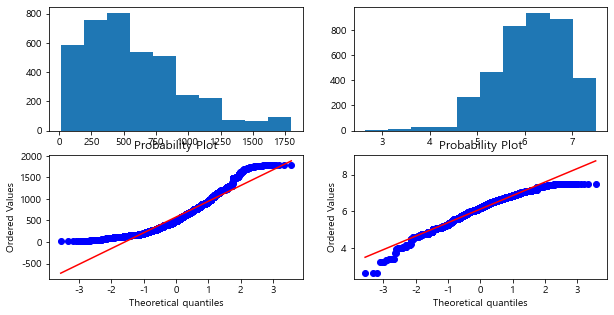

In [49]:
all_df['log_단지내주차면수'] = np.log1p(all_df['단지내주차면수'])
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,5))
ax[0][0].hist(all_df['단지내주차면수'])
ax[0][1].hist(all_df['log_단지내주차면수'])

stats.probplot(all_df['단지내주차면수'], plot=ax[1][0])
stats.probplot(all_df['log_단지내주차면수'], plot=ax[1][1])

((array([-3.56959256, -3.33019321, -3.19803567, ...,  3.19803567,
          3.33019321,  3.56959256]),
  array([3.29583687, 3.29583687, 3.29583687, ..., 7.85282781, 7.85282781,
         7.85282781])),
 (0.6093767949475518, 6.611311889490474, 0.9883341683848889))

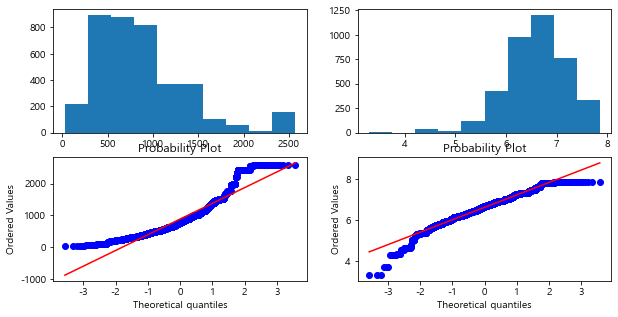

In [50]:
all_df['log_총세대수'] = np.log1p(all_df['총세대수'])
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,5))
ax[0][0].hist(all_df['총세대수'])
ax[0][1].hist(all_df['log_총세대수'])

stats.probplot(all_df['총세대수'], plot=ax[1][0])
stats.probplot(all_df['log_총세대수'], plot=ax[1][1])

((array([-3.56959256, -3.33019321, -3.19803567, ...,  3.19803567,
          3.33019321,  3.56959256]),
  array([0.6931472, 0.6931472, 0.6931472, ..., 7.293698 , 7.3072023,
         7.5315523], dtype=float32)),
 (1.6307518283269595, 3.662091016769409, 0.9441208816516677))

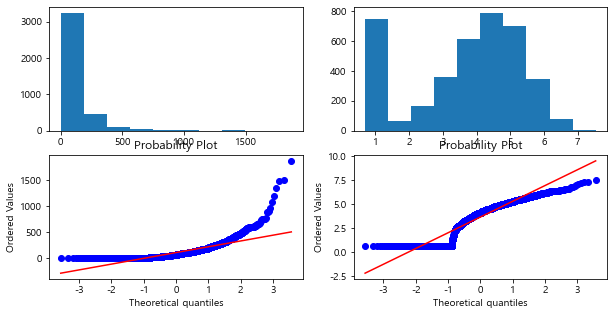

In [51]:
all_df['log_전용면적별세대수'] = np.log1p(all_df['전용면적별세대수'])
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,5))
ax[0][0].hist(all_df['전용면적별세대수'])
ax[0][1].hist(all_df['log_전용면적별세대수'])

stats.probplot(all_df['전용면적별세대수'], plot=ax[1][0])
stats.probplot(all_df['log_전용면적별세대수'], plot=ax[1][1])

(array([172., 260., 329., 272., 176., 579., 609., 774., 585., 121.]),
 array([0.        , 0.40253517, 0.80507034, 1.20760551, 1.61014068,
        2.01267585, 2.41521101, 2.81774618, 3.22028135, 3.62281652,
        4.02535169]),
 <BarContainer object of 10 artists>)

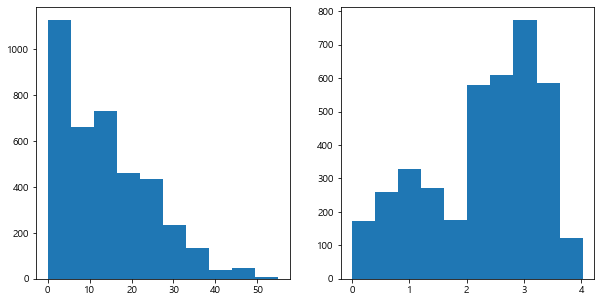

In [52]:
all_df['log_공가수'] = np.log1p(all_df['공가수'])
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
ax[0].hist(all_df['공가수'])
ax[1].hist(all_df['log_공가수'])

In [53]:
all_df_last = all_df.drop(['임대건물구분', '지역', '공급유형'] , axis=1)
all_df_last

,단지코드,총세대수,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,10분내지하철수,10분내버스정류장수,...,단지코드_lbl,qcut_총세대수,단지코드_Type,환산보증금,주차면수대비총세대수비율,거주율,log_단지내주차면수,log_총세대수,log_전용면적별세대수,log_공가수
0,C2515,545,33.48,276.0,17.0,1,9216000,82940,0.0,3.0,...,492,1,3.0,9299040,0.873397,0.968807,6.437752,6.302619,5.624018,2.890372
1,C2515,545,39.60,60.0,17.0,1,12672000,107130,0.0,3.0,...,492,1,3.0,12779230,0.873397,0.968807,6.437752,6.302619,4.110874,2.890372
2,C2515,545,39.60,20.0,17.0,1,12672000,107130,0.0,3.0,...,492,1,3.0,12779230,0.873397,0.968807,6.437752,6.302619,3.044523,2.890372
3,C2515,545,46.90,38.0,17.0,1,18433000,149760,0.0,3.0,...,492,1,3.0,18582860,0.873397,0.968807,6.437752,6.302619,3.663562,2.890372
4,C2515,545,46.90,19.0,17.0,1,18433000,149760,0.0,3.0,...,492,1,3.0,18582860,0.873397,0.968807,6.437752,6.302619,2.995732,2.890372
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3872,C1229,453,38.20,68.0,23.0,10,30101000,120400,0.0,2.0,...,76,0,1.0,30221500,1.429022,0.949227,5.762051,6.118097,4.234107,3.178054
3873,C1229,453,38.20,8.0,23.0,10,30101000,120400,0.0,2.0,...,76,0,1.0,30221500,1.429022,0.949227,5.762051,6.118097,2.197225,3.178054
3874,C1229,453,38.25,3.0,23.0,10,30101000,120400,0.0,2.0,...,76,0,1.0,30221500,1.429022,0.949227,5.762051,6.118097,1.386294,3.178054
3875,C1229,453,38.28,4.0,23.0,10,30101000,120400,0.0,2.0,...,76,0,1.0,30221500,1.429022,0.949227,5.762051,6.118097,1.609438,3.178054


In [54]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3877 entries, 0 to 3876
Data columns (total 49 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   단지코드          3877 non-null   category
 1   총세대수          3877 non-null   int64   
 2   임대건물구분        3877 non-null   object  
 3   지역            3877 non-null   object  
 4   공급유형          3877 non-null   object  
 5   전용면적          3877 non-null   float64 
 6   전용면적별세대수      3877 non-null   float32 
 7   공가수           3877 non-null   float64 
 8   자격유형          3877 non-null   int32   
 9   임대보증금         3877 non-null   int32   
 10  임대료           3877 non-null   int32   
 11  10분내지하철수      3877 non-null   float64 
 12  10분내버스정류장수    3877 non-null   float64 
 13  단지내주차면수       3877 non-null   float64 
 14  10대미만(여자)     3877 non-null   float64 
 15  10대미만(남자)     3877 non-null   float64 
 16  10대(여자)       3877 non-null   float64 
 17  10대(남자)       3877 non-null   float64 
 18  20대(여자) 

In [55]:
# '총세대수' : 0.333440, '단지내주차면수' : 0.861338, 임대건물구분_lbl : -0.449130
# 전용면적    0.112717, 전용면적별세대수   0.250513, 공가수           0.118910,
# 자격유형         -0.154034, 공급유형_lbl     -0.137277

In [56]:
train.corr()['등록차량수']

총세대수          0.326923
전용면적          0.106366
전용면적별세대수      0.254948
공가수           0.130775
10분내지하철수     -0.101792
10분내버스정류장수    0.110977
단지내주차면수       0.856549
등록차량수         1.000000
10대미만(여자)     0.268142
10대미만(남자)     0.274423
10대(여자)       0.017406
10대(남자)      -0.013654
20대(여자)       0.008058
20대(남자)      -0.138710
30대(여자)       0.384424
30대(남자)       0.369807
40대(여자)       0.186006
40대(남자)       0.320559
50대(여자)      -0.236608
50대(남자)      -0.266656
60대(여자)      -0.191946
60대(남자)      -0.243727
70대(여자)      -0.190950
70대(남자)      -0.147894
80대(여자)      -0.224072
80대(남자)      -0.151342
90대(여자)      -0.180396
90대(남자)      -0.054103
100대(여자)      0.134927
100대(남자)      0.006264
Name: 등록차량수, dtype: float64

(array([3.245e+03, 4.700e+02, 1.060e+02, 4.500e+01, 4.000e+00, 2.000e+00,
        1.000e+00, 3.000e+00, 0.000e+00, 1.000e+00]),
 array([1.0000e+00, 1.8740e+02, 3.7380e+02, 5.6020e+02, 7.4660e+02,
        9.3300e+02, 1.1194e+03, 1.3058e+03, 1.4922e+03, 1.6786e+03,
        1.8650e+03], dtype=float32),
 <BarContainer object of 10 artists>)

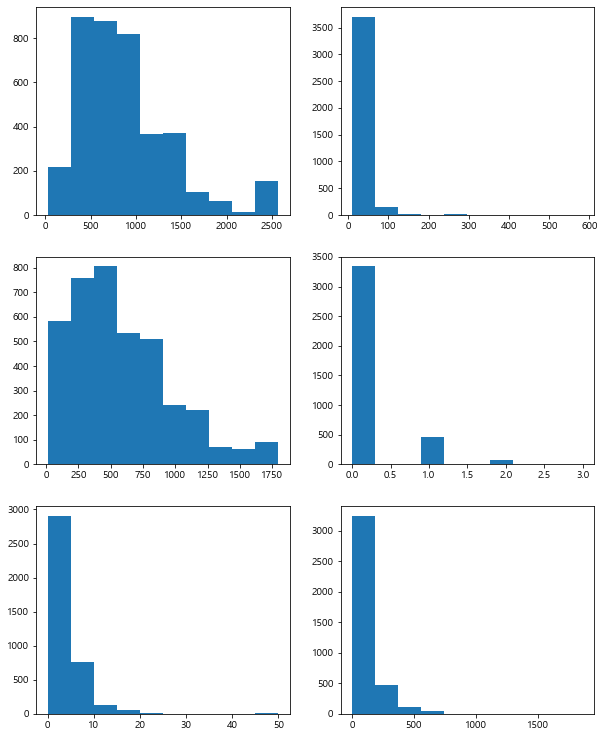

In [57]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(10,13))

ax[0][0].hist(all_df_last['총세대수'])
ax[0][1].hist(all_df_last['전용면적'])
ax[1][0].hist(all_df_last['단지내주차면수'])
ax[1][1].hist(all_df_last['10분내지하철수'])
ax[2][0].hist(all_df_last['10분내버스정류장수'])
ax[2][1].hist(all_df_last['전용면적별세대수'])

# 원핫 인코딩

In [58]:
# print("dummy 수행 전 shape",all_df_last.shape)
# all_df_last_oh = pd.get_dummies(all_df_last)
# print("dummy 수행 후 shape",all_df_last_oh.shape)

In [59]:
train_df = all_df_last.iloc[0:2869,:]
test_df = all_df_last.iloc[2869:,:]

train_df.shape, test_df.shape

train_df = pd.concat([train_df, train['등록차량수'] ], axis=1)
train_df

,단지코드,총세대수,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,10분내지하철수,10분내버스정류장수,...,qcut_총세대수,단지코드_Type,환산보증금,주차면수대비총세대수비율,거주율,log_단지내주차면수,log_총세대수,log_전용면적별세대수,log_공가수,등록차량수
0,C2515,545,33.48,276.0,17.0,1,9216000,82940,0.0,3.0,...,1,3.0,9299040,0.873397,0.968807,6.437752,6.302619,5.624018,2.890372,205.0
1,C2515,545,39.60,60.0,17.0,1,12672000,107130,0.0,3.0,...,1,3.0,12779230,0.873397,0.968807,6.437752,6.302619,4.110874,2.890372,205.0
2,C2515,545,39.60,20.0,17.0,1,12672000,107130,0.0,3.0,...,1,3.0,12779230,0.873397,0.968807,6.437752,6.302619,3.044523,2.890372,205.0
3,C2515,545,46.90,38.0,17.0,1,18433000,149760,0.0,3.0,...,1,3.0,18582860,0.873397,0.968807,6.437752,6.302619,3.663562,2.890372,205.0
4,C2515,545,46.90,19.0,17.0,1,18433000,149760,0.0,3.0,...,1,3.0,18582860,0.873397,0.968807,6.437752,6.302619,2.995732,2.890372,205.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2864,C2086,1080,59.94,30.0,7.0,1,39000000,460000,0.0,2.0,...,3,3.0,39460100,0.945709,0.993519,7.041412,6.985642,3.433987,2.079442,1524.0
2865,C2086,1080,74.92,156.0,7.0,1,49000000,550000,0.0,2.0,...,3,3.0,49550100,0.945709,0.993519,7.041412,6.985642,5.056246,2.079442,1524.0
2866,C2086,1080,74.93,78.0,7.0,1,49000000,550000,0.0,2.0,...,3,3.0,49550100,0.945709,0.993519,7.041412,6.985642,4.369448,2.079442,1524.0
2867,C2086,1080,84.88,160.0,7.0,1,61000000,600000,0.0,2.0,...,3,3.0,61600100,0.945709,0.993519,7.041412,6.985642,5.081404,2.079442,1524.0


In [60]:
train_df['log_등록차량수'] = np.log1p(train_df['등록차량수'])

In [61]:
from sklearn.model_selection import train_test_split

print("등록차량수 상관계수 : ", train_df.corr()['등록차량수'])
print()
print("log_등록차량수 상관계수 ; ", train_df.corr()['log_등록차량수'])

등록차량수 상관계수 :  총세대수            0.326923
전용면적            0.106366
전용면적별세대수        0.254948
공가수             0.130775
자격유형           -0.145695
임대보증금           0.412956
임대료             0.530381
10분내지하철수       -0.079587
10분내버스정류장수      0.110977
단지내주차면수         0.856549
10대미만(여자)       0.268142
10대미만(남자)       0.274423
10대(여자)         0.017406
10대(남자)        -0.013654
20대(여자)         0.008058
20대(남자)        -0.138710
30대(여자)         0.384424
30대(남자)         0.369807
40대(여자)         0.186006
40대(남자)         0.320559
50대(여자)        -0.236608
50대(남자)        -0.266656
60대(여자)        -0.191946
60대(남자)        -0.243727
70대(여자)        -0.190950
70대(남자)        -0.147894
80대(여자)        -0.224072
80대(남자)        -0.151342
90대(여자)        -0.180396
90대(남자)        -0.054103
100대(여자)        0.134927
100대(남자)        0.006264
임대건물구분_lbl     -0.449235
지역_lbl          0.044321
공급유형_lbl       -0.158484
단지코드_lbl       -0.097279
qcut_총세대수       0.391915
단지코드_Type       0.106931
환산보증금           0.414723
주차면수대비총세대수비

In [62]:
pd.set_option('display.min_rows',10)

In [63]:
train_df.head(30)

,단지코드,총세대수,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,10분내지하철수,10분내버스정류장수,...,단지코드_Type,환산보증금,주차면수대비총세대수비율,거주율,log_단지내주차면수,log_총세대수,log_전용면적별세대수,log_공가수,등록차량수,log_등록차량수
0,C2515,545,33.48,276.0,17.0,1,9216000,82940,0.0,3.0,...,3.0,9299040,0.873397,0.968807,6.437752,6.302619,5.624018,2.890372,205.0,5.327876
1,C2515,545,39.60,60.0,17.0,1,12672000,107130,0.0,3.0,...,3.0,12779230,0.873397,0.968807,6.437752,6.302619,4.110874,2.890372,205.0,5.327876
2,C2515,545,39.60,20.0,17.0,1,12672000,107130,0.0,3.0,...,3.0,12779230,0.873397,0.968807,6.437752,6.302619,3.044523,2.890372,205.0,5.327876
3,C2515,545,46.90,38.0,17.0,1,18433000,149760,0.0,3.0,...,3.0,18582860,0.873397,0.968807,6.437752,6.302619,3.663562,2.890372,205.0,5.327876
4,C2515,545,46.90,19.0,17.0,1,18433000,149760,0.0,3.0,...,3.0,18582860,0.873397,0.968807,6.437752,6.302619,2.995732,2.890372,205.0,5.327876
5,C2515,545,51.97,106.0,17.0,1,23042000,190090,0.0,3.0,...,3.0,23232190,0.873397,0.968807,6.437752,6.302619,4.672829,2.890372,205.0,5.327876
6,C2515,545,51.97,26.0,17.0,1,23042000,190090,0.0,3.0,...,3.0,23232190,0.873397,0.968807,6.437752,6.302619,3.295837,2.890372,205.0,5.327876
7,C2576,405,46.90,313.0,19.0,1,19436000,161780,0.0,4.0,...,3.0,19597880,1.368243,0.953086,5.693732,6.006353,5.749393,2.995732,73.0,4.304065
8,C2576,405,59.88,92.0,19.0,1,28252000,235420,0.0,4.0,...,3.0,28487520,1.368243,0.953086,5.693732,6.006353,4.532599,2.995732,73.0,4.304065
9,C2416,560,26.34,360.0,0.0,3,3138000,69820,0.0,5.0,...,3.0,3207920,3.636364,1.000000,5.043425,6.329721,5.888878,0.000000,63.0,4.158883


In [64]:
train_df.shape

(2869, 48)

In [65]:
train_df.isnull().sum()

단지코드            0
총세대수            0
전용면적            0
전용면적별세대수        0
공가수             0
자격유형            0
임대보증금           0
임대료             0
10분내지하철수        0
10분내버스정류장수      0
단지내주차면수         0
10대미만(여자)       0
10대미만(남자)       0
10대(여자)         0
10대(남자)         0
20대(여자)         0
20대(남자)         0
30대(여자)         0
30대(남자)         0
40대(여자)         0
40대(남자)         0
50대(여자)         0
50대(남자)         0
60대(여자)         0
60대(남자)         0
70대(여자)         0
70대(남자)         0
80대(여자)         0
80대(남자)         0
90대(여자)         0
90대(남자)         0
100대(여자)        0
100대(남자)        0
임대건물구분_lbl      0
지역_lbl          0
공급유형_lbl        0
단지코드_lbl        0
qcut_총세대수       0
단지코드_Type       0
환산보증금           0
주차면수대비총세대수비율    0
거주율             0
log_단지내주차면수     0
log_총세대수        0
log_전용면적별세대수    0
log_공가수         0
등록차량수           0
log_등록차량수       0
dtype: int64

In [66]:
train_df.columns

Index(['단지코드', '총세대수', '전용면적', '전용면적별세대수', '공가수', '자격유형', '임대보증금', '임대료',
       '10분내지하철수', '10분내버스정류장수', '단지내주차면수', '10대미만(여자)', '10대미만(남자)',
       '10대(여자)', '10대(남자)', '20대(여자)', '20대(남자)', '30대(여자)', '30대(남자)',
       '40대(여자)', '40대(남자)', '50대(여자)', '50대(남자)', '60대(여자)', '60대(남자)',
       '70대(여자)', '70대(남자)', '80대(여자)', '80대(남자)', '90대(여자)', '90대(남자)',
       '100대(여자)', '100대(남자)', '임대건물구분_lbl', '지역_lbl', '공급유형_lbl', '단지코드_lbl',
       'qcut_총세대수', '단지코드_Type', '환산보증금', '주차면수대비총세대수비율', '거주율', 'log_단지내주차면수',
       'log_총세대수', 'log_전용면적별세대수', 'log_공가수', '등록차량수', 'log_등록차량수'],
      dtype='object')

# 서울은 test에 없으니깐 제외하고 보자!

In [67]:
# train = train.loc[~(train['지역'] =='서울특별시'),:]

In [68]:
# sel = ['log_총세대수', '전용면적', '공가수', 'log_단지내주차면수',
#        'qcut_총세대수', '자격유형', '전용면적별세대수', '10분내버스정류장수',
#        '임대건물구분_lbl', '공급유형_lbl', '지역_lbl', '단지코드_lbl',
#        '단지코드_Type']
# sel = [ '총세대수', '전용면적', '전용면적별세대수', '공가수', '자격유형',
#        '10분내지하철수', '10분내버스정류장수', '단지내주차면수', '10대미만(여자)', '10대미만(남자)',
#        '10대(여자)', '10대(남자)', '20대(여자)', '20대(남자)', '30대(여자)', '30대(남자)',
#        '40대(여자)', '40대(남자)', '50대(여자)', '50대(남자)', '60대(여자)', '60대(남자)',
#        '70대(여자)', '70대(남자)', '80대(여자)', '80대(남자)', '90대(여자)', '90대(남자)',
#        '100대(여자)', '100대(남자)', '임대건물구분_lbl', '지역_lbl', '공급유형_lbl', '단지코드_lbl',
#        'qcut_총세대수', '단지코드_Type', '환산보증금', 'log_단지내주차면수', 'log_총세대수',
#        'log_전용면적별세대수', 'log_공가수']
# sel = [ '총세대수', '전용면적', '전용면적별세대수', '공가수', '자격유형',
#        '10분내지하철수', '10분내버스정류장수', '단지내주차면수', '10대미만(여자)', '10대미만(남자)',
#       '30대(여자)', '30대(남자)','지역_lbl', '공급유형_lbl', '단지코드_lbl','임대건물구분_lbl',
#        'qcut_총세대수', '단지코드_Type', '환산보증금', 'log_단지내주차면수', 'log_총세대수',
#        'log_전용면적별세대수', 'log_공가수']
# sel = [ '총세대수', '전용면적', '공가수', '자격유형',
#        '10분내지하철수', '10분내버스정류장수', '단지내주차면수', '10대미만(여자)', '10대미만(남자)',
#       '30대(여자)', '30대(남자)','지역_lbl', '공급유형_lbl', '단지코드_lbl','임대건물구분_lbl',
#        'qcut_총세대수', '단지코드_Type', '환산보증금', 'log_단지내주차면수', 'log_총세대수',
#        'log_전용면적별세대수', '주차면수대비총세대수비율','거주율']
# lable_name = 'log_등록차량수'

sel = [ '총세대수', '전용면적', '공가수', '자격유형',
       '10분내지하철수', '10분내버스정류장수', 'log_단지내주차면수', '10대미만(여자)', '10대미만(남자)',
      '30대(여자)', '30대(남자)','지역_lbl', '공급유형_lbl', '단지코드_lbl',
        '단지코드_Type']
lable_name = 'log_등록차량수'
X = train_df[sel]
y = train_df[lable_name]
test_X = test_df[sel]

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=0)

# 회귀 트리 모델 학습/예측/평가

In [69]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score #교차검증
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import mean_squared_error

In [70]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

from sklearn.metrics import mean_absolute_error
def get_mae_pred(preds):
    for key in preds.keys():
        pred_value = preds[key]
        mae = mean_absolute_error(y_test , pred_value)
        print('{0} 모델의 MAE: {1}'.format(key, mae))

xgb_reg = XGBRegressor(n_estimators=5000, learning_rate=0.05, 
                       colsample_bytree=0.5, subsample=0.8)
lgbm_reg = LGBMRegressor(n_estimators=5000, learning_rate=0.05, num_leaves=4, 
                         subsample=0.6, colsample_bytree=0.4, reg_lambda=10, n_jobs=-1)
catm_reg = CatBoostRegressor(n_estimators=5000, learning_rate=0.05 ,random_state= 0,verbose= 1,objective = "MAE")

xgb_reg.fit(X_train, y_train)
lgbm_reg.fit(X_train, y_train)
catm_reg.fit(X_train, y_train)

xgb_pred = xgb_reg.predict(X_test)
lgbm_pred = lgbm_reg.predict(X_test)
catm_pred = catm_reg.predict(X_test)


pred = 0.3 * xgb_pred + 0.3 * lgbm_pred + 0.4 * catm_pred
preds = {'최종 혼합': pred,
         'XGBM': xgb_pred,
         'LGBM': lgbm_pred,
          'CATM' : catm_pred}
  
get_mae_pred(preds)

0:	learn: 0.6797137	total: 152ms	remaining: 12m 38s
1:	learn: 0.6547234	total: 162ms	remaining: 6m 45s
2:	learn: 0.6283369	total: 173ms	remaining: 4m 48s
3:	learn: 0.6039075	total: 184ms	remaining: 3m 49s
4:	learn: 0.5815266	total: 194ms	remaining: 3m 13s
5:	learn: 0.5615544	total: 204ms	remaining: 2m 49s
6:	learn: 0.5421991	total: 214ms	remaining: 2m 32s
7:	learn: 0.5238874	total: 225ms	remaining: 2m 20s
8:	learn: 0.5082983	total: 235ms	remaining: 2m 10s
9:	learn: 0.4912621	total: 247ms	remaining: 2m 3s
10:	learn: 0.4751100	total: 259ms	remaining: 1m 57s
11:	learn: 0.4595566	total: 269ms	remaining: 1m 51s
12:	learn: 0.4441298	total: 280ms	remaining: 1m 47s
13:	learn: 0.4298979	total: 290ms	remaining: 1m 43s
14:	learn: 0.4182318	total: 302ms	remaining: 1m 40s
15:	learn: 0.4056338	total: 313ms	remaining: 1m 37s
16:	learn: 0.3951410	total: 323ms	remaining: 1m 34s
17:	learn: 0.3825331	total: 333ms	remaining: 1m 32s
18:	learn: 0.3718050	total: 344ms	remaining: 1m 30s
19:	learn: 0.3635712	t

162:	learn: 0.1253443	total: 1.81s	remaining: 53.9s
163:	learn: 0.1248602	total: 1.83s	remaining: 53.9s
164:	learn: 0.1242929	total: 1.84s	remaining: 53.8s
165:	learn: 0.1238976	total: 1.85s	remaining: 53.8s
166:	learn: 0.1236931	total: 1.86s	remaining: 53.8s
167:	learn: 0.1234945	total: 1.87s	remaining: 53.7s
168:	learn: 0.1233721	total: 1.88s	remaining: 53.7s
169:	learn: 0.1230761	total: 1.89s	remaining: 53.7s
170:	learn: 0.1225132	total: 1.9s	remaining: 53.6s
171:	learn: 0.1223238	total: 1.91s	remaining: 53.6s
172:	learn: 0.1215850	total: 1.92s	remaining: 53.6s
173:	learn: 0.1213005	total: 1.93s	remaining: 53.6s
174:	learn: 0.1207346	total: 1.94s	remaining: 53.5s
175:	learn: 0.1204910	total: 1.95s	remaining: 53.5s
176:	learn: 0.1201825	total: 1.96s	remaining: 53.5s
177:	learn: 0.1199158	total: 1.97s	remaining: 53.5s
178:	learn: 0.1196077	total: 1.98s	remaining: 53.4s
179:	learn: 0.1194615	total: 2s	remaining: 53.4s
180:	learn: 0.1191875	total: 2s	remaining: 53.4s
181:	learn: 0.11877

330:	learn: 0.0918493	total: 3.62s	remaining: 51s
331:	learn: 0.0915805	total: 3.63s	remaining: 51s
332:	learn: 0.0913542	total: 3.64s	remaining: 51s
333:	learn: 0.0913115	total: 3.65s	remaining: 51s
334:	learn: 0.0912034	total: 3.66s	remaining: 50.9s
335:	learn: 0.0911655	total: 3.67s	remaining: 50.9s
336:	learn: 0.0910984	total: 3.68s	remaining: 50.9s
337:	learn: 0.0910810	total: 3.69s	remaining: 50.9s
338:	learn: 0.0910612	total: 3.7s	remaining: 50.9s
339:	learn: 0.0910225	total: 3.71s	remaining: 50.9s
340:	learn: 0.0909334	total: 3.72s	remaining: 50.9s
341:	learn: 0.0908773	total: 3.74s	remaining: 50.9s
342:	learn: 0.0907251	total: 3.75s	remaining: 50.9s
343:	learn: 0.0906285	total: 3.76s	remaining: 50.9s
344:	learn: 0.0905944	total: 3.77s	remaining: 50.9s
345:	learn: 0.0904844	total: 3.79s	remaining: 50.9s
346:	learn: 0.0904044	total: 3.8s	remaining: 50.9s
347:	learn: 0.0903042	total: 3.81s	remaining: 50.9s
348:	learn: 0.0902744	total: 3.82s	remaining: 50.9s
349:	learn: 0.0901909	

492:	learn: 0.0766812	total: 5.42s	remaining: 49.5s
493:	learn: 0.0766395	total: 5.43s	remaining: 49.5s
494:	learn: 0.0765207	total: 5.44s	remaining: 49.5s
495:	learn: 0.0764712	total: 5.45s	remaining: 49.5s
496:	learn: 0.0764170	total: 5.46s	remaining: 49.4s
497:	learn: 0.0762298	total: 5.47s	remaining: 49.4s
498:	learn: 0.0761509	total: 5.47s	remaining: 49.4s
499:	learn: 0.0761170	total: 5.49s	remaining: 49.4s
500:	learn: 0.0760254	total: 5.5s	remaining: 49.4s
501:	learn: 0.0758602	total: 5.5s	remaining: 49.3s
502:	learn: 0.0758363	total: 5.52s	remaining: 49.3s
503:	learn: 0.0758191	total: 5.53s	remaining: 49.3s
504:	learn: 0.0757936	total: 5.54s	remaining: 49.3s
505:	learn: 0.0757854	total: 5.55s	remaining: 49.3s
506:	learn: 0.0756853	total: 5.57s	remaining: 49.3s
507:	learn: 0.0756573	total: 5.58s	remaining: 49.3s
508:	learn: 0.0756537	total: 5.59s	remaining: 49.3s
509:	learn: 0.0756105	total: 5.6s	remaining: 49.3s
510:	learn: 0.0755414	total: 5.61s	remaining: 49.3s
511:	learn: 0.0

657:	learn: 0.0678589	total: 7.22s	remaining: 47.6s
658:	learn: 0.0677547	total: 7.23s	remaining: 47.6s
659:	learn: 0.0676766	total: 7.24s	remaining: 47.6s
660:	learn: 0.0676356	total: 7.25s	remaining: 47.6s
661:	learn: 0.0675898	total: 7.26s	remaining: 47.6s
662:	learn: 0.0675143	total: 7.27s	remaining: 47.6s
663:	learn: 0.0674641	total: 7.28s	remaining: 47.6s
664:	learn: 0.0673935	total: 7.29s	remaining: 47.6s
665:	learn: 0.0673240	total: 7.3s	remaining: 47.5s
666:	learn: 0.0672058	total: 7.32s	remaining: 47.5s
667:	learn: 0.0671765	total: 7.33s	remaining: 47.5s
668:	learn: 0.0671463	total: 7.34s	remaining: 47.5s
669:	learn: 0.0671235	total: 7.35s	remaining: 47.5s
670:	learn: 0.0671071	total: 7.36s	remaining: 47.5s
671:	learn: 0.0670714	total: 7.37s	remaining: 47.5s
672:	learn: 0.0670479	total: 7.38s	remaining: 47.5s
673:	learn: 0.0668893	total: 7.39s	remaining: 47.5s
674:	learn: 0.0668362	total: 7.41s	remaining: 47.4s
675:	learn: 0.0667515	total: 7.42s	remaining: 47.4s
676:	learn: 0

826:	learn: 0.0595612	total: 9.03s	remaining: 45.6s
827:	learn: 0.0595560	total: 9.04s	remaining: 45.5s
828:	learn: 0.0595489	total: 9.05s	remaining: 45.5s
829:	learn: 0.0595272	total: 9.06s	remaining: 45.5s
830:	learn: 0.0595172	total: 9.07s	remaining: 45.5s
831:	learn: 0.0594826	total: 9.08s	remaining: 45.5s
832:	learn: 0.0594674	total: 9.09s	remaining: 45.5s
833:	learn: 0.0594424	total: 9.1s	remaining: 45.5s
834:	learn: 0.0594378	total: 9.11s	remaining: 45.5s
835:	learn: 0.0594279	total: 9.12s	remaining: 45.4s
836:	learn: 0.0594206	total: 9.13s	remaining: 45.4s
837:	learn: 0.0593885	total: 9.14s	remaining: 45.4s
838:	learn: 0.0593833	total: 9.15s	remaining: 45.4s
839:	learn: 0.0593414	total: 9.16s	remaining: 45.4s
840:	learn: 0.0593311	total: 9.18s	remaining: 45.4s
841:	learn: 0.0592851	total: 9.19s	remaining: 45.4s
842:	learn: 0.0592524	total: 9.2s	remaining: 45.4s
843:	learn: 0.0592340	total: 9.21s	remaining: 45.4s
844:	learn: 0.0592103	total: 9.22s	remaining: 45.3s
845:	learn: 0.

995:	learn: 0.0543500	total: 10.8s	remaining: 43.5s
996:	learn: 0.0543467	total: 10.8s	remaining: 43.5s
997:	learn: 0.0543049	total: 10.8s	remaining: 43.5s
998:	learn: 0.0541529	total: 10.9s	remaining: 43.5s
999:	learn: 0.0541482	total: 10.9s	remaining: 43.5s
1000:	learn: 0.0541200	total: 10.9s	remaining: 43.5s
1001:	learn: 0.0540869	total: 10.9s	remaining: 43.4s
1002:	learn: 0.0540281	total: 10.9s	remaining: 43.4s
1003:	learn: 0.0539722	total: 10.9s	remaining: 43.4s
1004:	learn: 0.0539622	total: 10.9s	remaining: 43.4s
1005:	learn: 0.0539547	total: 10.9s	remaining: 43.4s
1006:	learn: 0.0539489	total: 10.9s	remaining: 43.4s
1007:	learn: 0.0539372	total: 10.9s	remaining: 43.4s
1008:	learn: 0.0539256	total: 11s	remaining: 43.4s
1009:	learn: 0.0539128	total: 11s	remaining: 43.3s
1010:	learn: 0.0539051	total: 11s	remaining: 43.3s
1011:	learn: 0.0538686	total: 11s	remaining: 43.3s
1012:	learn: 0.0537609	total: 11s	remaining: 43.3s
1013:	learn: 0.0537476	total: 11s	remaining: 43.3s
1014:	lear

1162:	learn: 0.0492908	total: 12.6s	remaining: 41.6s
1163:	learn: 0.0492301	total: 12.6s	remaining: 41.6s
1164:	learn: 0.0492148	total: 12.6s	remaining: 41.6s
1165:	learn: 0.0492068	total: 12.7s	remaining: 41.6s
1166:	learn: 0.0491703	total: 12.7s	remaining: 41.6s
1167:	learn: 0.0491614	total: 12.7s	remaining: 41.6s
1168:	learn: 0.0491559	total: 12.7s	remaining: 41.6s
1169:	learn: 0.0491430	total: 12.7s	remaining: 41.6s
1170:	learn: 0.0491203	total: 12.7s	remaining: 41.6s
1171:	learn: 0.0491185	total: 12.7s	remaining: 41.6s
1172:	learn: 0.0490728	total: 12.7s	remaining: 41.5s
1173:	learn: 0.0490661	total: 12.7s	remaining: 41.5s
1174:	learn: 0.0490615	total: 12.8s	remaining: 41.5s
1175:	learn: 0.0490239	total: 12.8s	remaining: 41.5s
1176:	learn: 0.0490216	total: 12.8s	remaining: 41.5s
1177:	learn: 0.0489680	total: 12.8s	remaining: 41.5s
1178:	learn: 0.0488760	total: 12.8s	remaining: 41.5s
1179:	learn: 0.0488573	total: 12.8s	remaining: 41.5s
1180:	learn: 0.0488529	total: 12.8s	remaining:

1329:	learn: 0.0455653	total: 14.4s	remaining: 39.8s
1330:	learn: 0.0455601	total: 14.4s	remaining: 39.8s
1331:	learn: 0.0455576	total: 14.4s	remaining: 39.7s
1332:	learn: 0.0455476	total: 14.4s	remaining: 39.7s
1333:	learn: 0.0455460	total: 14.5s	remaining: 39.7s
1334:	learn: 0.0455418	total: 14.5s	remaining: 39.7s
1335:	learn: 0.0455341	total: 14.5s	remaining: 39.7s
1336:	learn: 0.0455265	total: 14.5s	remaining: 39.7s
1337:	learn: 0.0455193	total: 14.5s	remaining: 39.7s
1338:	learn: 0.0454884	total: 14.5s	remaining: 39.7s
1339:	learn: 0.0454213	total: 14.5s	remaining: 39.6s
1340:	learn: 0.0454208	total: 14.5s	remaining: 39.6s
1341:	learn: 0.0454072	total: 14.5s	remaining: 39.6s
1342:	learn: 0.0453780	total: 14.5s	remaining: 39.6s
1343:	learn: 0.0453427	total: 14.6s	remaining: 39.6s
1344:	learn: 0.0453378	total: 14.6s	remaining: 39.6s
1345:	learn: 0.0453314	total: 14.6s	remaining: 39.6s
1346:	learn: 0.0453051	total: 14.6s	remaining: 39.6s
1347:	learn: 0.0452852	total: 14.6s	remaining:

1499:	learn: 0.0423192	total: 16.2s	remaining: 37.8s
1500:	learn: 0.0423186	total: 16.2s	remaining: 37.8s
1501:	learn: 0.0423098	total: 16.2s	remaining: 37.8s
1502:	learn: 0.0423059	total: 16.2s	remaining: 37.8s
1503:	learn: 0.0422913	total: 16.3s	remaining: 37.8s
1504:	learn: 0.0422889	total: 16.3s	remaining: 37.8s
1505:	learn: 0.0422878	total: 16.3s	remaining: 37.8s
1506:	learn: 0.0422254	total: 16.3s	remaining: 37.8s
1507:	learn: 0.0422231	total: 16.3s	remaining: 37.7s
1508:	learn: 0.0422218	total: 16.3s	remaining: 37.7s
1509:	learn: 0.0422188	total: 16.3s	remaining: 37.7s
1510:	learn: 0.0422156	total: 16.3s	remaining: 37.7s
1511:	learn: 0.0422131	total: 16.3s	remaining: 37.7s
1512:	learn: 0.0422089	total: 16.4s	remaining: 37.7s
1513:	learn: 0.0422038	total: 16.4s	remaining: 37.7s
1514:	learn: 0.0422031	total: 16.4s	remaining: 37.7s
1515:	learn: 0.0421956	total: 16.4s	remaining: 37.7s
1516:	learn: 0.0421914	total: 16.4s	remaining: 37.6s
1517:	learn: 0.0421904	total: 16.4s	remaining:

1655:	learn: 0.0401572	total: 17.9s	remaining: 36.1s
1656:	learn: 0.0401537	total: 17.9s	remaining: 36.1s
1657:	learn: 0.0401511	total: 17.9s	remaining: 36.1s
1658:	learn: 0.0401354	total: 17.9s	remaining: 36s
1659:	learn: 0.0399844	total: 17.9s	remaining: 36s
1660:	learn: 0.0399814	total: 17.9s	remaining: 36s
1661:	learn: 0.0399705	total: 17.9s	remaining: 36s
1662:	learn: 0.0399582	total: 17.9s	remaining: 36s
1663:	learn: 0.0399502	total: 17.9s	remaining: 36s
1664:	learn: 0.0399492	total: 18s	remaining: 36s
1665:	learn: 0.0399454	total: 18s	remaining: 36s
1666:	learn: 0.0399419	total: 18s	remaining: 35.9s
1667:	learn: 0.0399409	total: 18s	remaining: 35.9s
1668:	learn: 0.0399352	total: 18s	remaining: 35.9s
1669:	learn: 0.0399275	total: 18s	remaining: 35.9s
1670:	learn: 0.0399153	total: 18s	remaining: 35.9s
1671:	learn: 0.0399141	total: 18s	remaining: 35.9s
1672:	learn: 0.0399109	total: 18s	remaining: 35.9s
1673:	learn: 0.0399074	total: 18.1s	remaining: 35.9s
1674:	learn: 0.0398877	tota

1824:	learn: 0.0373707	total: 19.8s	remaining: 34.5s
1825:	learn: 0.0373695	total: 19.9s	remaining: 34.5s
1826:	learn: 0.0372929	total: 19.9s	remaining: 34.5s
1827:	learn: 0.0371515	total: 19.9s	remaining: 34.5s
1828:	learn: 0.0371294	total: 19.9s	remaining: 34.5s
1829:	learn: 0.0371086	total: 19.9s	remaining: 34.5s
1830:	learn: 0.0371065	total: 19.9s	remaining: 34.5s
1831:	learn: 0.0370307	total: 19.9s	remaining: 34.5s
1832:	learn: 0.0370100	total: 19.9s	remaining: 34.4s
1833:	learn: 0.0369994	total: 19.9s	remaining: 34.4s
1834:	learn: 0.0369788	total: 20s	remaining: 34.4s
1835:	learn: 0.0369601	total: 20s	remaining: 34.4s
1836:	learn: 0.0369514	total: 20s	remaining: 34.4s
1837:	learn: 0.0369504	total: 20s	remaining: 34.4s
1838:	learn: 0.0369371	total: 20s	remaining: 34.4s
1839:	learn: 0.0369325	total: 20s	remaining: 34.4s
1840:	learn: 0.0369189	total: 20s	remaining: 34.3s
1841:	learn: 0.0368984	total: 20s	remaining: 34.3s
1842:	learn: 0.0368955	total: 20s	remaining: 34.3s
1843:	learn

1986:	learn: 0.0353737	total: 21.5s	remaining: 32.6s
1987:	learn: 0.0353374	total: 21.5s	remaining: 32.6s
1988:	learn: 0.0353369	total: 21.5s	remaining: 32.6s
1989:	learn: 0.0353362	total: 21.5s	remaining: 32.6s
1990:	learn: 0.0353343	total: 21.6s	remaining: 32.6s
1991:	learn: 0.0353316	total: 21.6s	remaining: 32.6s
1992:	learn: 0.0353278	total: 21.6s	remaining: 32.6s
1993:	learn: 0.0353261	total: 21.6s	remaining: 32.5s
1994:	learn: 0.0353258	total: 21.6s	remaining: 32.5s
1995:	learn: 0.0353180	total: 21.6s	remaining: 32.5s
1996:	learn: 0.0353159	total: 21.6s	remaining: 32.5s
1997:	learn: 0.0353153	total: 21.6s	remaining: 32.5s
1998:	learn: 0.0352684	total: 21.6s	remaining: 32.5s
1999:	learn: 0.0352606	total: 21.6s	remaining: 32.5s
2000:	learn: 0.0352606	total: 21.7s	remaining: 32.5s
2001:	learn: 0.0352339	total: 21.7s	remaining: 32.4s
2002:	learn: 0.0352295	total: 21.7s	remaining: 32.4s
2003:	learn: 0.0352282	total: 21.7s	remaining: 32.4s
2004:	learn: 0.0352152	total: 21.7s	remaining:

2148:	learn: 0.0338010	total: 23.2s	remaining: 30.7s
2149:	learn: 0.0337995	total: 23.2s	remaining: 30.7s
2150:	learn: 0.0337985	total: 23.2s	remaining: 30.7s
2151:	learn: 0.0337891	total: 23.2s	remaining: 30.7s
2152:	learn: 0.0337856	total: 23.2s	remaining: 30.7s
2153:	learn: 0.0337751	total: 23.2s	remaining: 30.7s
2154:	learn: 0.0337690	total: 23.2s	remaining: 30.7s
2155:	learn: 0.0337665	total: 23.2s	remaining: 30.7s
2156:	learn: 0.0337513	total: 23.2s	remaining: 30.6s
2157:	learn: 0.0337100	total: 23.3s	remaining: 30.6s
2158:	learn: 0.0336982	total: 23.3s	remaining: 30.6s
2159:	learn: 0.0336912	total: 23.3s	remaining: 30.6s
2160:	learn: 0.0336904	total: 23.3s	remaining: 30.6s
2161:	learn: 0.0336843	total: 23.3s	remaining: 30.6s
2162:	learn: 0.0336834	total: 23.3s	remaining: 30.6s
2163:	learn: 0.0336612	total: 23.3s	remaining: 30.6s
2164:	learn: 0.0336601	total: 23.3s	remaining: 30.6s
2165:	learn: 0.0336491	total: 23.3s	remaining: 30.5s
2166:	learn: 0.0336411	total: 23.4s	remaining:

2308:	learn: 0.0328393	total: 24.8s	remaining: 28.9s
2309:	learn: 0.0328374	total: 24.8s	remaining: 28.9s
2310:	learn: 0.0328367	total: 24.8s	remaining: 28.9s
2311:	learn: 0.0328354	total: 24.8s	remaining: 28.9s
2312:	learn: 0.0328218	total: 24.9s	remaining: 28.9s
2313:	learn: 0.0328207	total: 24.9s	remaining: 28.9s
2314:	learn: 0.0328194	total: 24.9s	remaining: 28.9s
2315:	learn: 0.0328184	total: 24.9s	remaining: 28.8s
2316:	learn: 0.0328167	total: 24.9s	remaining: 28.8s
2317:	learn: 0.0328146	total: 24.9s	remaining: 28.8s
2318:	learn: 0.0328130	total: 24.9s	remaining: 28.8s
2319:	learn: 0.0328100	total: 24.9s	remaining: 28.8s
2320:	learn: 0.0327997	total: 24.9s	remaining: 28.8s
2321:	learn: 0.0327938	total: 25s	remaining: 28.8s
2322:	learn: 0.0327892	total: 25s	remaining: 28.8s
2323:	learn: 0.0327874	total: 25s	remaining: 28.8s
2324:	learn: 0.0327845	total: 25s	remaining: 28.7s
2325:	learn: 0.0327835	total: 25s	remaining: 28.7s
2326:	learn: 0.0327821	total: 25s	remaining: 28.7s
2327:

2465:	learn: 0.0314333	total: 26.5s	remaining: 27.2s
2466:	learn: 0.0313996	total: 26.5s	remaining: 27.2s
2467:	learn: 0.0313833	total: 26.5s	remaining: 27.2s
2468:	learn: 0.0313260	total: 26.5s	remaining: 27.2s
2469:	learn: 0.0313212	total: 26.5s	remaining: 27.2s
2470:	learn: 0.0313198	total: 26.5s	remaining: 27.1s
2471:	learn: 0.0313189	total: 26.5s	remaining: 27.1s
2472:	learn: 0.0313064	total: 26.5s	remaining: 27.1s
2473:	learn: 0.0313057	total: 26.6s	remaining: 27.1s
2474:	learn: 0.0312985	total: 26.6s	remaining: 27.1s
2475:	learn: 0.0312958	total: 26.6s	remaining: 27.1s
2476:	learn: 0.0312925	total: 26.6s	remaining: 27.1s
2477:	learn: 0.0312892	total: 26.6s	remaining: 27.1s
2478:	learn: 0.0312866	total: 26.6s	remaining: 27.1s
2479:	learn: 0.0312159	total: 26.6s	remaining: 27.1s
2480:	learn: 0.0312156	total: 26.6s	remaining: 27s
2481:	learn: 0.0312068	total: 26.6s	remaining: 27s
2482:	learn: 0.0312039	total: 26.7s	remaining: 27s
2483:	learn: 0.0311985	total: 26.7s	remaining: 27s
2

2629:	learn: 0.0301411	total: 28.3s	remaining: 25.5s
2630:	learn: 0.0301398	total: 28.3s	remaining: 25.5s
2631:	learn: 0.0301394	total: 28.3s	remaining: 25.5s
2632:	learn: 0.0301387	total: 28.3s	remaining: 25.4s
2633:	learn: 0.0301386	total: 28.3s	remaining: 25.4s
2634:	learn: 0.0301376	total: 28.3s	remaining: 25.4s
2635:	learn: 0.0301313	total: 28.3s	remaining: 25.4s
2636:	learn: 0.0301311	total: 28.3s	remaining: 25.4s
2637:	learn: 0.0301296	total: 28.4s	remaining: 25.4s
2638:	learn: 0.0301285	total: 28.4s	remaining: 25.4s
2639:	learn: 0.0301280	total: 28.4s	remaining: 25.4s
2640:	learn: 0.0301256	total: 28.4s	remaining: 25.4s
2641:	learn: 0.0301247	total: 28.4s	remaining: 25.3s
2642:	learn: 0.0301243	total: 28.4s	remaining: 25.3s
2643:	learn: 0.0301201	total: 28.4s	remaining: 25.3s
2644:	learn: 0.0301170	total: 28.4s	remaining: 25.3s
2645:	learn: 0.0300936	total: 28.4s	remaining: 25.3s
2646:	learn: 0.0300926	total: 28.5s	remaining: 25.3s
2647:	learn: 0.0300922	total: 28.5s	remaining:

2785:	learn: 0.0290915	total: 29.9s	remaining: 23.8s
2786:	learn: 0.0290894	total: 29.9s	remaining: 23.8s
2787:	learn: 0.0290803	total: 29.9s	remaining: 23.8s
2788:	learn: 0.0290763	total: 30s	remaining: 23.7s
2789:	learn: 0.0290719	total: 30s	remaining: 23.7s
2790:	learn: 0.0290701	total: 30s	remaining: 23.7s
2791:	learn: 0.0290467	total: 30s	remaining: 23.7s
2792:	learn: 0.0290436	total: 30s	remaining: 23.7s
2793:	learn: 0.0290432	total: 30s	remaining: 23.7s
2794:	learn: 0.0290368	total: 30s	remaining: 23.7s
2795:	learn: 0.0290359	total: 30s	remaining: 23.7s
2796:	learn: 0.0290343	total: 30s	remaining: 23.7s
2797:	learn: 0.0290321	total: 30.1s	remaining: 23.7s
2798:	learn: 0.0290232	total: 30.1s	remaining: 23.6s
2799:	learn: 0.0290220	total: 30.1s	remaining: 23.6s
2800:	learn: 0.0290209	total: 30.1s	remaining: 23.6s
2801:	learn: 0.0290201	total: 30.1s	remaining: 23.6s
2802:	learn: 0.0290171	total: 30.1s	remaining: 23.6s
2803:	learn: 0.0290078	total: 30.1s	remaining: 23.6s
2804:	learn

2954:	learn: 0.0283142	total: 31.7s	remaining: 22s
2955:	learn: 0.0283137	total: 31.7s	remaining: 21.9s
2956:	learn: 0.0283125	total: 31.8s	remaining: 21.9s
2957:	learn: 0.0283084	total: 31.8s	remaining: 21.9s
2958:	learn: 0.0283071	total: 31.8s	remaining: 21.9s
2959:	learn: 0.0283060	total: 31.8s	remaining: 21.9s
2960:	learn: 0.0283022	total: 31.8s	remaining: 21.9s
2961:	learn: 0.0283006	total: 31.8s	remaining: 21.9s
2962:	learn: 0.0282996	total: 31.8s	remaining: 21.9s
2963:	learn: 0.0282990	total: 31.8s	remaining: 21.9s
2964:	learn: 0.0282971	total: 31.8s	remaining: 21.9s
2965:	learn: 0.0282825	total: 31.8s	remaining: 21.8s
2966:	learn: 0.0282783	total: 31.9s	remaining: 21.8s
2967:	learn: 0.0282759	total: 31.9s	remaining: 21.8s
2968:	learn: 0.0282742	total: 31.9s	remaining: 21.8s
2969:	learn: 0.0282686	total: 31.9s	remaining: 21.8s
2970:	learn: 0.0282682	total: 31.9s	remaining: 21.8s
2971:	learn: 0.0282651	total: 31.9s	remaining: 21.8s
2972:	learn: 0.0282637	total: 31.9s	remaining: 2

3111:	learn: 0.0274009	total: 33.4s	remaining: 20.3s
3112:	learn: 0.0274004	total: 33.4s	remaining: 20.3s
3113:	learn: 0.0273911	total: 33.4s	remaining: 20.2s
3114:	learn: 0.0273809	total: 33.4s	remaining: 20.2s
3115:	learn: 0.0273703	total: 33.4s	remaining: 20.2s
3116:	learn: 0.0273702	total: 33.5s	remaining: 20.2s
3117:	learn: 0.0273670	total: 33.5s	remaining: 20.2s
3118:	learn: 0.0273462	total: 33.5s	remaining: 20.2s
3119:	learn: 0.0273423	total: 33.5s	remaining: 20.2s
3120:	learn: 0.0273419	total: 33.5s	remaining: 20.2s
3121:	learn: 0.0273382	total: 33.5s	remaining: 20.2s
3122:	learn: 0.0273375	total: 33.5s	remaining: 20.1s
3123:	learn: 0.0273372	total: 33.5s	remaining: 20.1s
3124:	learn: 0.0273289	total: 33.5s	remaining: 20.1s
3125:	learn: 0.0273251	total: 33.5s	remaining: 20.1s
3126:	learn: 0.0273245	total: 33.5s	remaining: 20.1s
3127:	learn: 0.0273195	total: 33.6s	remaining: 20.1s
3128:	learn: 0.0273167	total: 33.6s	remaining: 20.1s
3129:	learn: 0.0273158	total: 33.6s	remaining:

3269:	learn: 0.0267318	total: 35.1s	remaining: 18.5s
3270:	learn: 0.0267311	total: 35.1s	remaining: 18.5s
3271:	learn: 0.0267279	total: 35.1s	remaining: 18.5s
3272:	learn: 0.0267241	total: 35.1s	remaining: 18.5s
3273:	learn: 0.0267214	total: 35.1s	remaining: 18.5s
3274:	learn: 0.0267201	total: 35.1s	remaining: 18.5s
3275:	learn: 0.0267147	total: 35.1s	remaining: 18.5s
3276:	learn: 0.0267118	total: 35.1s	remaining: 18.5s
3277:	learn: 0.0267111	total: 35.1s	remaining: 18.5s
3278:	learn: 0.0267103	total: 35.1s	remaining: 18.4s
3279:	learn: 0.0267085	total: 35.2s	remaining: 18.4s
3280:	learn: 0.0267045	total: 35.2s	remaining: 18.4s
3281:	learn: 0.0267032	total: 35.2s	remaining: 18.4s
3282:	learn: 0.0267028	total: 35.2s	remaining: 18.4s
3283:	learn: 0.0266970	total: 35.2s	remaining: 18.4s
3284:	learn: 0.0266956	total: 35.2s	remaining: 18.4s
3285:	learn: 0.0266730	total: 35.2s	remaining: 18.4s
3286:	learn: 0.0266710	total: 35.2s	remaining: 18.4s
3287:	learn: 0.0266694	total: 35.2s	remaining:

3427:	learn: 0.0262206	total: 36.7s	remaining: 16.8s
3428:	learn: 0.0262187	total: 36.7s	remaining: 16.8s
3429:	learn: 0.0262063	total: 36.7s	remaining: 16.8s
3430:	learn: 0.0262055	total: 36.7s	remaining: 16.8s
3431:	learn: 0.0261962	total: 36.7s	remaining: 16.8s
3432:	learn: 0.0261952	total: 36.8s	remaining: 16.8s
3433:	learn: 0.0261872	total: 36.8s	remaining: 16.8s
3434:	learn: 0.0261864	total: 36.8s	remaining: 16.8s
3435:	learn: 0.0261850	total: 36.8s	remaining: 16.7s
3436:	learn: 0.0261850	total: 36.8s	remaining: 16.7s
3437:	learn: 0.0261842	total: 36.8s	remaining: 16.7s
3438:	learn: 0.0261836	total: 36.8s	remaining: 16.7s
3439:	learn: 0.0261827	total: 36.8s	remaining: 16.7s
3440:	learn: 0.0261823	total: 36.8s	remaining: 16.7s
3441:	learn: 0.0261813	total: 36.8s	remaining: 16.7s
3442:	learn: 0.0261791	total: 36.9s	remaining: 16.7s
3443:	learn: 0.0261763	total: 36.9s	remaining: 16.7s
3444:	learn: 0.0261755	total: 36.9s	remaining: 16.6s
3445:	learn: 0.0261753	total: 36.9s	remaining:

3590:	learn: 0.0253415	total: 38.5s	remaining: 15.1s
3591:	learn: 0.0253402	total: 38.5s	remaining: 15.1s
3592:	learn: 0.0253394	total: 38.5s	remaining: 15.1s
3593:	learn: 0.0253365	total: 38.5s	remaining: 15.1s
3594:	learn: 0.0253289	total: 38.6s	remaining: 15.1s
3595:	learn: 0.0253211	total: 38.6s	remaining: 15.1s
3596:	learn: 0.0253204	total: 38.6s	remaining: 15s
3597:	learn: 0.0253172	total: 38.6s	remaining: 15s
3598:	learn: 0.0253136	total: 38.6s	remaining: 15s
3599:	learn: 0.0253047	total: 38.6s	remaining: 15s
3600:	learn: 0.0252808	total: 38.6s	remaining: 15s
3601:	learn: 0.0252779	total: 38.6s	remaining: 15s
3602:	learn: 0.0252775	total: 38.6s	remaining: 15s
3603:	learn: 0.0252731	total: 38.7s	remaining: 15s
3604:	learn: 0.0252719	total: 38.7s	remaining: 15s
3605:	learn: 0.0252617	total: 38.7s	remaining: 14.9s
3606:	learn: 0.0252598	total: 38.7s	remaining: 14.9s
3607:	learn: 0.0252518	total: 38.7s	remaining: 14.9s
3608:	learn: 0.0252333	total: 38.7s	remaining: 14.9s
3609:	learn

3752:	learn: 0.0245738	total: 40.3s	remaining: 13.4s
3753:	learn: 0.0245723	total: 40.3s	remaining: 13.4s
3754:	learn: 0.0245714	total: 40.4s	remaining: 13.4s
3755:	learn: 0.0245489	total: 40.4s	remaining: 13.4s
3756:	learn: 0.0245487	total: 40.4s	remaining: 13.4s
3757:	learn: 0.0245470	total: 40.4s	remaining: 13.4s
3758:	learn: 0.0245443	total: 40.4s	remaining: 13.3s
3759:	learn: 0.0245397	total: 40.4s	remaining: 13.3s
3760:	learn: 0.0245381	total: 40.4s	remaining: 13.3s
3761:	learn: 0.0245140	total: 40.5s	remaining: 13.3s
3762:	learn: 0.0245136	total: 40.5s	remaining: 13.3s
3763:	learn: 0.0245128	total: 40.5s	remaining: 13.3s
3764:	learn: 0.0245111	total: 40.5s	remaining: 13.3s
3765:	learn: 0.0245094	total: 40.5s	remaining: 13.3s
3766:	learn: 0.0244955	total: 40.5s	remaining: 13.3s
3767:	learn: 0.0244877	total: 40.5s	remaining: 13.3s
3768:	learn: 0.0244762	total: 40.5s	remaining: 13.2s
3769:	learn: 0.0244745	total: 40.6s	remaining: 13.2s
3770:	learn: 0.0244741	total: 40.6s	remaining:

3917:	learn: 0.0241593	total: 42.3s	remaining: 11.7s
3918:	learn: 0.0241589	total: 42.3s	remaining: 11.7s
3919:	learn: 0.0241585	total: 42.3s	remaining: 11.7s
3920:	learn: 0.0241550	total: 42.4s	remaining: 11.7s
3921:	learn: 0.0241548	total: 42.4s	remaining: 11.6s
3922:	learn: 0.0241541	total: 42.4s	remaining: 11.6s
3923:	learn: 0.0241539	total: 42.4s	remaining: 11.6s
3924:	learn: 0.0241527	total: 42.4s	remaining: 11.6s
3925:	learn: 0.0241524	total: 42.4s	remaining: 11.6s
3926:	learn: 0.0241518	total: 42.4s	remaining: 11.6s
3927:	learn: 0.0241511	total: 42.4s	remaining: 11.6s
3928:	learn: 0.0241504	total: 42.4s	remaining: 11.6s
3929:	learn: 0.0241335	total: 42.4s	remaining: 11.6s
3930:	learn: 0.0241323	total: 42.5s	remaining: 11.5s
3931:	learn: 0.0241321	total: 42.5s	remaining: 11.5s
3932:	learn: 0.0241319	total: 42.5s	remaining: 11.5s
3933:	learn: 0.0241286	total: 42.5s	remaining: 11.5s
3934:	learn: 0.0241176	total: 42.5s	remaining: 11.5s
3935:	learn: 0.0241176	total: 42.5s	remaining:

4073:	learn: 0.0237533	total: 44s	remaining: 9.99s
4074:	learn: 0.0237473	total: 44s	remaining: 9.98s
4075:	learn: 0.0237435	total: 44s	remaining: 9.97s
4076:	learn: 0.0237434	total: 44s	remaining: 9.96s
4077:	learn: 0.0237433	total: 44s	remaining: 9.95s
4078:	learn: 0.0237419	total: 44s	remaining: 9.94s
4079:	learn: 0.0237417	total: 44s	remaining: 9.93s
4080:	learn: 0.0237412	total: 44s	remaining: 9.91s
4081:	learn: 0.0237409	total: 44s	remaining: 9.9s
4082:	learn: 0.0237390	total: 44.1s	remaining: 9.89s
4083:	learn: 0.0237365	total: 44.1s	remaining: 9.88s
4084:	learn: 0.0237356	total: 44.1s	remaining: 9.87s
4085:	learn: 0.0237353	total: 44.1s	remaining: 9.86s
4086:	learn: 0.0237347	total: 44.1s	remaining: 9.85s
4087:	learn: 0.0237345	total: 44.1s	remaining: 9.84s
4088:	learn: 0.0237342	total: 44.1s	remaining: 9.83s
4089:	learn: 0.0237341	total: 44.1s	remaining: 9.82s
4090:	learn: 0.0237301	total: 44.1s	remaining: 9.81s
4091:	learn: 0.0237300	total: 44.1s	remaining: 9.79s
4092:	learn:

4234:	learn: 0.0234174	total: 45.6s	remaining: 8.24s
4235:	learn: 0.0234170	total: 45.6s	remaining: 8.23s
4236:	learn: 0.0234101	total: 45.6s	remaining: 8.22s
4237:	learn: 0.0233964	total: 45.6s	remaining: 8.21s
4238:	learn: 0.0233953	total: 45.6s	remaining: 8.19s
4239:	learn: 0.0233863	total: 45.7s	remaining: 8.18s
4240:	learn: 0.0233859	total: 45.7s	remaining: 8.17s
4241:	learn: 0.0233829	total: 45.7s	remaining: 8.16s
4242:	learn: 0.0233825	total: 45.7s	remaining: 8.15s
4243:	learn: 0.0233785	total: 45.7s	remaining: 8.14s
4244:	learn: 0.0233715	total: 45.7s	remaining: 8.13s
4245:	learn: 0.0233711	total: 45.7s	remaining: 8.12s
4246:	learn: 0.0233703	total: 45.7s	remaining: 8.11s
4247:	learn: 0.0233286	total: 45.7s	remaining: 8.1s
4248:	learn: 0.0233278	total: 45.8s	remaining: 8.09s
4249:	learn: 0.0233248	total: 45.8s	remaining: 8.08s
4250:	learn: 0.0233033	total: 45.8s	remaining: 8.06s
4251:	learn: 0.0233027	total: 45.8s	remaining: 8.05s
4252:	learn: 0.0233013	total: 45.8s	remaining: 

4394:	learn: 0.0226675	total: 47.3s	remaining: 6.51s
4395:	learn: 0.0226531	total: 47.3s	remaining: 6.5s
4396:	learn: 0.0226529	total: 47.3s	remaining: 6.48s
4397:	learn: 0.0226493	total: 47.3s	remaining: 6.47s
4398:	learn: 0.0226481	total: 47.3s	remaining: 6.46s
4399:	learn: 0.0226478	total: 47.3s	remaining: 6.45s
4400:	learn: 0.0226474	total: 47.3s	remaining: 6.44s
4401:	learn: 0.0226427	total: 47.3s	remaining: 6.43s
4402:	learn: 0.0226388	total: 47.3s	remaining: 6.42s
4403:	learn: 0.0226302	total: 47.4s	remaining: 6.41s
4404:	learn: 0.0226297	total: 47.4s	remaining: 6.4s
4405:	learn: 0.0226292	total: 47.4s	remaining: 6.39s
4406:	learn: 0.0226285	total: 47.4s	remaining: 6.38s
4407:	learn: 0.0226279	total: 47.4s	remaining: 6.37s
4408:	learn: 0.0226261	total: 47.4s	remaining: 6.35s
4409:	learn: 0.0226258	total: 47.4s	remaining: 6.34s
4410:	learn: 0.0226243	total: 47.4s	remaining: 6.33s
4411:	learn: 0.0226232	total: 47.4s	remaining: 6.32s
4412:	learn: 0.0226224	total: 47.4s	remaining: 6

4561:	learn: 0.0222972	total: 49.1s	remaining: 4.71s
4562:	learn: 0.0222971	total: 49.1s	remaining: 4.7s
4563:	learn: 0.0222967	total: 49.1s	remaining: 4.69s
4564:	learn: 0.0222743	total: 49.1s	remaining: 4.68s
4565:	learn: 0.0222739	total: 49.1s	remaining: 4.67s
4566:	learn: 0.0222739	total: 49.2s	remaining: 4.66s
4567:	learn: 0.0222735	total: 49.2s	remaining: 4.65s
4568:	learn: 0.0222731	total: 49.2s	remaining: 4.64s
4569:	learn: 0.0222730	total: 49.2s	remaining: 4.63s
4570:	learn: 0.0222726	total: 49.2s	remaining: 4.62s
4571:	learn: 0.0222725	total: 49.2s	remaining: 4.61s
4572:	learn: 0.0222718	total: 49.2s	remaining: 4.6s
4573:	learn: 0.0222716	total: 49.2s	remaining: 4.58s
4574:	learn: 0.0222704	total: 49.2s	remaining: 4.58s
4575:	learn: 0.0222701	total: 49.3s	remaining: 4.56s
4576:	learn: 0.0222698	total: 49.3s	remaining: 4.55s
4577:	learn: 0.0222695	total: 49.3s	remaining: 4.54s
4578:	learn: 0.0222691	total: 49.3s	remaining: 4.53s
4579:	learn: 0.0222668	total: 49.3s	remaining: 4

4720:	learn: 0.0218861	total: 50.9s	remaining: 3.01s
4721:	learn: 0.0218795	total: 50.9s	remaining: 3s
4722:	learn: 0.0218792	total: 50.9s	remaining: 2.99s
4723:	learn: 0.0218772	total: 50.9s	remaining: 2.98s
4724:	learn: 0.0218771	total: 50.9s	remaining: 2.96s
4725:	learn: 0.0218724	total: 50.9s	remaining: 2.95s
4726:	learn: 0.0218723	total: 51s	remaining: 2.94s
4727:	learn: 0.0218722	total: 51s	remaining: 2.93s
4728:	learn: 0.0218721	total: 51s	remaining: 2.92s
4729:	learn: 0.0218721	total: 51s	remaining: 2.91s
4730:	learn: 0.0218719	total: 51s	remaining: 2.9s
4731:	learn: 0.0218709	total: 51s	remaining: 2.89s
4732:	learn: 0.0218707	total: 51s	remaining: 2.88s
4733:	learn: 0.0218705	total: 51s	remaining: 2.87s
4734:	learn: 0.0218701	total: 51s	remaining: 2.86s
4735:	learn: 0.0218688	total: 51.1s	remaining: 2.85s
4736:	learn: 0.0218687	total: 51.1s	remaining: 2.83s
4737:	learn: 0.0218580	total: 51.1s	remaining: 2.82s
4738:	learn: 0.0218573	total: 51.1s	remaining: 2.81s
4739:	learn: 0.

4879:	learn: 0.0213582	total: 52.7s	remaining: 1.3s
4880:	learn: 0.0213581	total: 52.7s	remaining: 1.28s
4881:	learn: 0.0213542	total: 52.7s	remaining: 1.27s
4882:	learn: 0.0213535	total: 52.7s	remaining: 1.26s
4883:	learn: 0.0213530	total: 52.7s	remaining: 1.25s
4884:	learn: 0.0213513	total: 52.8s	remaining: 1.24s
4885:	learn: 0.0213490	total: 52.8s	remaining: 1.23s
4886:	learn: 0.0213488	total: 52.8s	remaining: 1.22s
4887:	learn: 0.0213469	total: 52.8s	remaining: 1.21s
4888:	learn: 0.0213468	total: 52.8s	remaining: 1.2s
4889:	learn: 0.0213461	total: 52.8s	remaining: 1.19s
4890:	learn: 0.0213452	total: 52.8s	remaining: 1.18s
4891:	learn: 0.0213448	total: 52.8s	remaining: 1.17s
4892:	learn: 0.0213434	total: 52.9s	remaining: 1.16s
4893:	learn: 0.0213429	total: 52.9s	remaining: 1.15s
4894:	learn: 0.0213409	total: 52.9s	remaining: 1.13s
4895:	learn: 0.0213407	total: 52.9s	remaining: 1.12s
4896:	learn: 0.0213400	total: 52.9s	remaining: 1.11s
4897:	learn: 0.0213189	total: 52.9s	remaining: 1

# sel = ['log_총세대수', '전용면적', '공가수', 'log_단지내주차면수',
       'qcut_총세대수', '자격유형', '전용면적별세대수', '10분내버스정류장수',
       '임대건물구분_lbl', '공급유형_lbl', '지역_lbl', '단지코드_lbl',
       '단지코드_Type']
       
* XGBRegressor 5 CV 시 최적 평균 RMAE 값: 0.561, 최적 alpha:{'n_estimators': 2000}      
* LGBMRegressor 5 CV 시 최적 평균 RMAE 값: 0.5789, 최적 alpha:{'n_estimators': 2000}
* CatBoostRegressor 5 CV 시 최적 평균 RMAE 값: 0.5614, 최적 alpha:{'n_estimators': 2000}
* 최종 혼합 모델의 MAE: 0.06148143788677414
* XGBM 모델의 MAE: 0.026202300105588303
* LGBM 모델의 MAE: 0.10375955751155994

# sel = [ '총세대수', '전용면적', '전용면적별세대수', '공가수', '자격유형',
       '10분내지하철수', '10분내버스정류장수', '단지내주차면수', '10대미만(여자)', '10대미만(남자)',
      '30대(여자)', '30대(남자)','지역_lbl', '공급유형_lbl', '단지코드_lbl','임대건물구분_lbl',
       'qcut_총세대수', '단지코드_Type', '환산보증금', 'log_단지내주차면수', 'log_총세대수',
       'log_전용면적별세대수', 'log_공가수']
lable_name = 'log_등록차량수'

* XGBRegressor 5 CV 시 최적 평균 RMAE 값: 0.5689, 최적 alpha:{'n_estimators': 2000}
* LGBMRegressor 5 CV 시 최적 평균 RMAE 값: 0.5781, 최적 alpha:{'n_estimators': 2000}
* CatBoostRegressor 5 CV 시 최적 평균 RMAE 값: 0.5701, 최적 alpha:{'n_estimators': 2000}

* 최종 혼합 모델의 MAE: 0.05357396246440822
* XGBM 모델의 MAE: 0.025235652142157578
* LGBM 모델의 MAE: 0.08719012565977427

# sel = [ '총세대수', '전용면적', '공가수', '자격유형',
       '10분내지하철수', '10분내버스정류장수', '단지내주차면수', '10대미만(여자)', '10대미만(남자)',
      '30대(여자)', '30대(남자)','지역_lbl', '공급유형_lbl', '단지코드_lbl','임대건물구분_lbl',
       'qcut_총세대수', '단지코드_Type', '환산보증금', 'log_단지내주차면수', 'log_총세대수',
       'log_전용면적별세대수', '주차면수대비총세대수비율','거주율']
lable_name = 'log_등록차량수'

* XGBRegressor 5 CV 시 최적 평균 MAE 값: 0.3178, 최적 alpha:{'n_estimators': 2000}
* LGBMRegressor 5 CV 시 최적 평균 MAE 값: 0.3312, 최적 alpha:{'n_estimators': 2000}
* CatBoostRegressor 5 CV 시 최적 평균 MAE 값: 0.3139, 최적 alpha:{'n_estimators': 2000}

* 최종 혼합 모델의 MAE: 0.048265198465836344
* XGBM 모델의 MAE: 0.01935228778564425
* LGBM 모델의 MAE: 0.08074077359302155
* CATM 모델의 MAE: 0.05379142726570961

# sel = [ '총세대수', '전용면적', '공가수', '자격유형',
       '10분내지하철수', '10분내버스정류장수', '단지내주차면수', '10대미만(여자)', '10대미만(남자)',
      '30대(여자)', '30대(남자)','지역_lbl', '공급유형_lbl', '단지코드_lbl','임대건물구분_lbl',
       'qcut_총세대수', '단지코드_Type', '환산보증금', 'log_단지내주차면수', 'log_총세대수',
       'log_전용면적별세대수', '주차면수대비총세대수비율','거주율']
lable_name = 'log_등록차량수'

* 최종 혼합 모델의 MAE: 0.0326218717153772
* XGBM 모델의 MAE: 0.01930947618185736
* LGBM 모델의 MAE: 0.04455987633255611
* CATM 모델의 MAE: 0.041844595139978576


# sel = [ '총세대수', '전용면적', '공가수', '자격유형',
       '10분내지하철수', '10분내버스정류장수', '단지내주차면수','지역_lbl', '공급유형_lbl', '단지코드_lbl','임대건물구분_lbl',
       'qcut_총세대수', '단지코드_Type', '환산보증금', 'log_단지내주차면수', 'log_총세대수',
       'log_전용면적별세대수', '주차면수대비총세대수비율','거주율']
lable_name = 'log_등록차량수'

* 나이테이블 제외해봤다~
* 최종 혼합 모델의 MAE: 0.038097369051566174
* XGBM 모델의 MAE: 0.023607419600352723
* LGBM 모델의 MAE: 0.049200211539695136
* CATM 모델의 MAE: 0.04903453231159108



# 서울 삭제 및 임대건물구분_lbl 컬럼 제외
# sel = [ '총세대수', '전용면적', '공가수', '자격유형',
       '10분내지하철수', '10분내버스정류장수', '단지내주차면수', '10대미만(여자)', '10대미만(남자)',
      '30대(여자)', '30대(남자)','지역_lbl', '공급유형_lbl', '단지코드_lbl',
       'qcut_총세대수', '단지코드_Type', '환산보증금', 'log_단지내주차면수', 'log_총세대수',
       'log_전용면적별세대수', '주차면수대비총세대수비율','거주율']
lable_name = 'log_등록차량수'
* 최종 혼합 모델의 MAE: 0.0340476772506829
* XGBM 모델의 MAE: 0.018507504968209274
* LGBM 모델의 MAE: 0.044830610881126276
* CATM 모델의 MAE: 0.04573791319635671

# sel = [ '총세대수', '전용면적', '공가수', '자격유형',
       '10분내지하철수', '10분내버스정류장수', '단지내주차면수', '10대미만(여자)', '10대미만(남자)',
      '30대(여자)', '30대(남자)','지역_lbl', '공급유형_lbl', '단지코드_lbl',
       'qcut_총세대수', '단지코드_Type', '환산보증금', 'log_단지내주차면수', 'log_총세대수',
       'log_전용면적별세대수', '주차면수대비총세대수비율','거주율']
* 영향 없는듯...       
lable_name = 'log_등록차량수' 
최종 혼합 모델의 MAE: 0.0340476772506829
XGBM 모델의 MAE: 0.018507504968209274
LGBM 모델의 MAE: 0.044830610881126276
CATM 모델의 MAE: 0.04573791319635671

# sel = [ '총세대수', '전용면적', '공가수', '자격유형',
       '10분내지하철수', '10분내버스정류장수', '단지내주차면수', '10대미만(여자)', '10대미만(남자)',
      '30대(여자)', '30대(남자)','지역_lbl', '공급유형_lbl', '단지코드_lbl',
        '단지코드_Type']
lable_name = 'log_등록차량수' 

* (서울 제외 했음)
* 최종 혼합 모델의 MAE: 0.03205725448554007
* XGBM 모델의 MAE: 0.01486607906707985
* LGBM 모델의 MAE: 0.05449243366413449
* CATM 모델의 MAE: 0.03481886431042245 
* 실제 점수 : 94.04934

# estimator  : 10000, 서울을 제외 안했음
* 최종 혼합 모델의 MAE: 0.024092371956384508
* XGBM 모델의 MAE: 0.014821758343255774
* LGBM 모델의 MAE: 0.034581596232140584
* CATM 모델의 MAE: 0.02864762086305747
* 실제 점수 :94.04588

# 서울 데이터 다시 살림
# sel = [ '총세대수', '전용면적', '공가수', '자격유형',
       '10분내지하철수', '10분내버스정류장수', '단지내주차면수', '10대미만(여자)', '10대미만(남자)',
      '30대(여자)', '30대(남자)','지역_lbl', '공급유형_lbl', '단지코드_lbl',
        '단지코드_Type']
* lable_name = 'log_등록차량수'
* 최종 혼합 모델의 MAE: 0.03205725448554007
* XGBM 모델의 MAE: 0.01486607906707985
* LGBM 모델의 MAE: 0.05449243366413449
* CATM 모델의 MAE: 0.03481886431042245

# log_단지내주차면수 로 변경
# sel = [ '총세대수', '전용면적', '공가수', '자격유형',
       '10분내지하철수', '10분내버스정류장수', 'log_단지내주차면수', '10대미만(여자)', '10대미만(남자)',
      '30대(여자)', '30대(남자)','지역_lbl', '공급유형_lbl', '단지코드_lbl',
        '단지코드_Type']
lable_name = 'log_등록차량수'
* 최종 혼합 모델의 MAE: 0.0319842263933502
* XGBM 모델의 MAE: 0.014659369120077419
* LGBM 모델의 MAE: 0.05449243366413449
* CATM 모델의 MAE: 0.03481886431042245

# Age 정보 없애보기





# 최종모델 만들기

In [71]:
model_last = CatBoostRegressor(n_estimators=5000, learning_rate=0.05 ,random_state= 0,verbose= 1,objective = "MAE")
model_last.fit(X_train, y_train)
pred = model_last.predict(test_X)
pred[0:10]

0:	learn: 0.6797137	total: 17.2ms	remaining: 1m 26s
1:	learn: 0.6547234	total: 28.7ms	remaining: 1m 11s
2:	learn: 0.6283369	total: 46.2ms	remaining: 1m 16s
3:	learn: 0.6039075	total: 62.6ms	remaining: 1m 18s
4:	learn: 0.5815266	total: 74.5ms	remaining: 1m 14s
5:	learn: 0.5615544	total: 88.2ms	remaining: 1m 13s
6:	learn: 0.5421991	total: 106ms	remaining: 1m 15s
7:	learn: 0.5238874	total: 119ms	remaining: 1m 14s
8:	learn: 0.5082983	total: 130ms	remaining: 1m 11s
9:	learn: 0.4912621	total: 140ms	remaining: 1m 9s
10:	learn: 0.4751100	total: 155ms	remaining: 1m 10s
11:	learn: 0.4595566	total: 167ms	remaining: 1m 9s
12:	learn: 0.4441298	total: 179ms	remaining: 1m 8s
13:	learn: 0.4298979	total: 196ms	remaining: 1m 9s
14:	learn: 0.4182318	total: 211ms	remaining: 1m 10s
15:	learn: 0.4056338	total: 228ms	remaining: 1m 10s
16:	learn: 0.3951410	total: 241ms	remaining: 1m 10s
17:	learn: 0.3825331	total: 254ms	remaining: 1m 10s
18:	learn: 0.3718050	total: 268ms	remaining: 1m 10s
19:	learn: 0.3635712

163:	learn: 0.1248602	total: 2.14s	remaining: 1m 3s
164:	learn: 0.1242929	total: 2.15s	remaining: 1m 3s
165:	learn: 0.1238976	total: 2.16s	remaining: 1m 2s
166:	learn: 0.1236931	total: 2.17s	remaining: 1m 2s
167:	learn: 0.1234945	total: 2.19s	remaining: 1m 2s
168:	learn: 0.1233721	total: 2.22s	remaining: 1m 3s
169:	learn: 0.1230761	total: 2.24s	remaining: 1m 3s
170:	learn: 0.1225132	total: 2.26s	remaining: 1m 3s
171:	learn: 0.1223238	total: 2.28s	remaining: 1m 3s
172:	learn: 0.1215850	total: 2.3s	remaining: 1m 4s
173:	learn: 0.1213005	total: 2.31s	remaining: 1m 4s
174:	learn: 0.1207346	total: 2.33s	remaining: 1m 4s
175:	learn: 0.1204910	total: 2.35s	remaining: 1m 4s
176:	learn: 0.1201825	total: 2.37s	remaining: 1m 4s
177:	learn: 0.1199158	total: 2.39s	remaining: 1m 4s
178:	learn: 0.1196077	total: 2.41s	remaining: 1m 4s
179:	learn: 0.1194615	total: 2.44s	remaining: 1m 5s
180:	learn: 0.1191875	total: 2.46s	remaining: 1m 5s
181:	learn: 0.1187798	total: 2.48s	remaining: 1m 5s
182:	learn: 0

325:	learn: 0.0921499	total: 5.29s	remaining: 1m 15s
326:	learn: 0.0920955	total: 5.3s	remaining: 1m 15s
327:	learn: 0.0919432	total: 5.33s	remaining: 1m 15s
328:	learn: 0.0919190	total: 5.34s	remaining: 1m 15s
329:	learn: 0.0918690	total: 5.35s	remaining: 1m 15s
330:	learn: 0.0918493	total: 5.37s	remaining: 1m 15s
331:	learn: 0.0915805	total: 5.38s	remaining: 1m 15s
332:	learn: 0.0913542	total: 5.39s	remaining: 1m 15s
333:	learn: 0.0913115	total: 5.41s	remaining: 1m 15s
334:	learn: 0.0912034	total: 5.42s	remaining: 1m 15s
335:	learn: 0.0911655	total: 5.43s	remaining: 1m 15s
336:	learn: 0.0910984	total: 5.44s	remaining: 1m 15s
337:	learn: 0.0910810	total: 5.46s	remaining: 1m 15s
338:	learn: 0.0910612	total: 5.47s	remaining: 1m 15s
339:	learn: 0.0910225	total: 5.48s	remaining: 1m 15s
340:	learn: 0.0909334	total: 5.49s	remaining: 1m 15s
341:	learn: 0.0908773	total: 5.5s	remaining: 1m 14s
342:	learn: 0.0907251	total: 5.51s	remaining: 1m 14s
343:	learn: 0.0906285	total: 5.53s	remaining: 1m

481:	learn: 0.0773169	total: 7.68s	remaining: 1m 12s
482:	learn: 0.0772008	total: 7.7s	remaining: 1m 12s
483:	learn: 0.0771652	total: 7.71s	remaining: 1m 11s
484:	learn: 0.0771077	total: 7.72s	remaining: 1m 11s
485:	learn: 0.0770954	total: 7.73s	remaining: 1m 11s
486:	learn: 0.0770686	total: 7.74s	remaining: 1m 11s
487:	learn: 0.0769991	total: 7.75s	remaining: 1m 11s
488:	learn: 0.0768612	total: 7.77s	remaining: 1m 11s
489:	learn: 0.0767987	total: 7.78s	remaining: 1m 11s
490:	learn: 0.0767581	total: 7.79s	remaining: 1m 11s
491:	learn: 0.0767128	total: 7.8s	remaining: 1m 11s
492:	learn: 0.0766812	total: 7.81s	remaining: 1m 11s
493:	learn: 0.0766395	total: 7.82s	remaining: 1m 11s
494:	learn: 0.0765207	total: 7.83s	remaining: 1m 11s
495:	learn: 0.0764712	total: 7.84s	remaining: 1m 11s
496:	learn: 0.0764170	total: 7.85s	remaining: 1m 11s
497:	learn: 0.0762298	total: 7.86s	remaining: 1m 11s
498:	learn: 0.0761509	total: 7.88s	remaining: 1m 11s
499:	learn: 0.0761170	total: 7.89s	remaining: 1m

642:	learn: 0.0686714	total: 9.49s	remaining: 1m 4s
643:	learn: 0.0686469	total: 9.5s	remaining: 1m 4s
644:	learn: 0.0684979	total: 9.51s	remaining: 1m 4s
645:	learn: 0.0684883	total: 9.52s	remaining: 1m 4s
646:	learn: 0.0684536	total: 9.53s	remaining: 1m 4s
647:	learn: 0.0684331	total: 9.54s	remaining: 1m 4s
648:	learn: 0.0684212	total: 9.55s	remaining: 1m 4s
649:	learn: 0.0684135	total: 9.56s	remaining: 1m 3s
650:	learn: 0.0682726	total: 9.57s	remaining: 1m 3s
651:	learn: 0.0681565	total: 9.58s	remaining: 1m 3s
652:	learn: 0.0680253	total: 9.59s	remaining: 1m 3s
653:	learn: 0.0680082	total: 9.6s	remaining: 1m 3s
654:	learn: 0.0679931	total: 9.62s	remaining: 1m 3s
655:	learn: 0.0679407	total: 9.63s	remaining: 1m 3s
656:	learn: 0.0679186	total: 9.64s	remaining: 1m 3s
657:	learn: 0.0678589	total: 9.66s	remaining: 1m 3s
658:	learn: 0.0677547	total: 9.67s	remaining: 1m 3s
659:	learn: 0.0676766	total: 9.68s	remaining: 1m 3s
660:	learn: 0.0676356	total: 9.7s	remaining: 1m 3s
661:	learn: 0.0

813:	learn: 0.0598461	total: 11.4s	remaining: 58.9s
814:	learn: 0.0597828	total: 11.5s	remaining: 58.8s
815:	learn: 0.0597781	total: 11.5s	remaining: 58.8s
816:	learn: 0.0597535	total: 11.5s	remaining: 58.8s
817:	learn: 0.0597175	total: 11.5s	remaining: 58.8s
818:	learn: 0.0597121	total: 11.5s	remaining: 58.7s
819:	learn: 0.0596953	total: 11.5s	remaining: 58.7s
820:	learn: 0.0596857	total: 11.5s	remaining: 58.7s
821:	learn: 0.0596758	total: 11.5s	remaining: 58.6s
822:	learn: 0.0596682	total: 11.6s	remaining: 58.6s
823:	learn: 0.0596368	total: 11.6s	remaining: 58.6s
824:	learn: 0.0595908	total: 11.6s	remaining: 58.6s
825:	learn: 0.0595748	total: 11.6s	remaining: 58.5s
826:	learn: 0.0595612	total: 11.6s	remaining: 58.5s
827:	learn: 0.0595560	total: 11.6s	remaining: 58.5s
828:	learn: 0.0595489	total: 11.6s	remaining: 58.5s
829:	learn: 0.0595272	total: 11.6s	remaining: 58.4s
830:	learn: 0.0595172	total: 11.6s	remaining: 58.4s
831:	learn: 0.0594826	total: 11.7s	remaining: 58.4s
832:	learn: 

973:	learn: 0.0549744	total: 13.4s	remaining: 55.4s
974:	learn: 0.0549635	total: 13.4s	remaining: 55.4s
975:	learn: 0.0549605	total: 13.4s	remaining: 55.4s
976:	learn: 0.0549501	total: 13.4s	remaining: 55.4s
977:	learn: 0.0549468	total: 13.5s	remaining: 55.3s
978:	learn: 0.0549075	total: 13.5s	remaining: 55.3s
979:	learn: 0.0548974	total: 13.5s	remaining: 55.3s
980:	learn: 0.0548695	total: 13.5s	remaining: 55.3s
981:	learn: 0.0548332	total: 13.5s	remaining: 55.3s
982:	learn: 0.0546884	total: 13.5s	remaining: 55.3s
983:	learn: 0.0546597	total: 13.5s	remaining: 55.3s
984:	learn: 0.0545976	total: 13.6s	remaining: 55.3s
985:	learn: 0.0545619	total: 13.6s	remaining: 55.3s
986:	learn: 0.0545340	total: 13.6s	remaining: 55.3s
987:	learn: 0.0544801	total: 13.6s	remaining: 55.2s
988:	learn: 0.0544777	total: 13.6s	remaining: 55.2s
989:	learn: 0.0544663	total: 13.6s	remaining: 55.2s
990:	learn: 0.0544641	total: 13.6s	remaining: 55.2s
991:	learn: 0.0544538	total: 13.7s	remaining: 55.2s
992:	learn: 

1130:	learn: 0.0501791	total: 15.4s	remaining: 52.6s
1131:	learn: 0.0501748	total: 15.4s	remaining: 52.5s
1132:	learn: 0.0501738	total: 15.4s	remaining: 52.5s
1133:	learn: 0.0501702	total: 15.4s	remaining: 52.5s
1134:	learn: 0.0501667	total: 15.4s	remaining: 52.5s
1135:	learn: 0.0501078	total: 15.4s	remaining: 52.4s
1136:	learn: 0.0501065	total: 15.4s	remaining: 52.4s
1137:	learn: 0.0500941	total: 15.4s	remaining: 52.4s
1138:	learn: 0.0500898	total: 15.5s	remaining: 52.4s
1139:	learn: 0.0500128	total: 15.5s	remaining: 52.4s
1140:	learn: 0.0500036	total: 15.5s	remaining: 52.4s
1141:	learn: 0.0499791	total: 15.5s	remaining: 52.4s
1142:	learn: 0.0499222	total: 15.5s	remaining: 52.3s
1143:	learn: 0.0498968	total: 15.5s	remaining: 52.3s
1144:	learn: 0.0498619	total: 15.5s	remaining: 52.3s
1145:	learn: 0.0498525	total: 15.5s	remaining: 52.3s
1146:	learn: 0.0498436	total: 15.6s	remaining: 52.3s
1147:	learn: 0.0498281	total: 15.6s	remaining: 52.2s
1148:	learn: 0.0498104	total: 15.6s	remaining:

1296:	learn: 0.0463754	total: 17.3s	remaining: 49.4s
1297:	learn: 0.0462380	total: 17.3s	remaining: 49.4s
1298:	learn: 0.0461104	total: 17.3s	remaining: 49.4s
1299:	learn: 0.0459981	total: 17.4s	remaining: 49.4s
1300:	learn: 0.0459858	total: 17.4s	remaining: 49.4s
1301:	learn: 0.0459435	total: 17.4s	remaining: 49.4s
1302:	learn: 0.0459019	total: 17.4s	remaining: 49.3s
1303:	learn: 0.0458938	total: 17.4s	remaining: 49.3s
1304:	learn: 0.0458857	total: 17.4s	remaining: 49.3s
1305:	learn: 0.0458720	total: 17.4s	remaining: 49.3s
1306:	learn: 0.0458592	total: 17.4s	remaining: 49.3s
1307:	learn: 0.0458199	total: 17.4s	remaining: 49.2s
1308:	learn: 0.0458147	total: 17.5s	remaining: 49.2s
1309:	learn: 0.0457964	total: 17.5s	remaining: 49.2s
1310:	learn: 0.0457907	total: 17.5s	remaining: 49.2s
1311:	learn: 0.0457839	total: 17.5s	remaining: 49.2s
1312:	learn: 0.0457755	total: 17.5s	remaining: 49.2s
1313:	learn: 0.0457558	total: 17.5s	remaining: 49.2s
1314:	learn: 0.0457447	total: 17.5s	remaining:

1457:	learn: 0.0428841	total: 19.1s	remaining: 46.5s
1458:	learn: 0.0428816	total: 19.2s	remaining: 46.5s
1459:	learn: 0.0428786	total: 19.2s	remaining: 46.5s
1460:	learn: 0.0428490	total: 19.2s	remaining: 46.5s
1461:	learn: 0.0428472	total: 19.2s	remaining: 46.4s
1462:	learn: 0.0428303	total: 19.2s	remaining: 46.4s
1463:	learn: 0.0427921	total: 19.2s	remaining: 46.4s
1464:	learn: 0.0427833	total: 19.2s	remaining: 46.4s
1465:	learn: 0.0427692	total: 19.2s	remaining: 46.4s
1466:	learn: 0.0427638	total: 19.2s	remaining: 46.3s
1467:	learn: 0.0427552	total: 19.3s	remaining: 46.3s
1468:	learn: 0.0427478	total: 19.3s	remaining: 46.3s
1469:	learn: 0.0427373	total: 19.3s	remaining: 46.3s
1470:	learn: 0.0427278	total: 19.3s	remaining: 46.3s
1471:	learn: 0.0427079	total: 19.3s	remaining: 46.3s
1472:	learn: 0.0427042	total: 19.3s	remaining: 46.2s
1473:	learn: 0.0427009	total: 19.3s	remaining: 46.2s
1474:	learn: 0.0426976	total: 19.3s	remaining: 46.2s
1475:	learn: 0.0426641	total: 19.3s	remaining:

1619:	learn: 0.0404682	total: 20.9s	remaining: 43.7s
1620:	learn: 0.0404671	total: 21s	remaining: 43.7s
1621:	learn: 0.0404551	total: 21s	remaining: 43.7s
1622:	learn: 0.0404525	total: 21s	remaining: 43.6s
1623:	learn: 0.0404483	total: 21s	remaining: 43.6s
1624:	learn: 0.0404462	total: 21s	remaining: 43.6s
1625:	learn: 0.0404410	total: 21s	remaining: 43.6s
1626:	learn: 0.0404399	total: 21s	remaining: 43.6s
1627:	learn: 0.0404359	total: 21s	remaining: 43.6s
1628:	learn: 0.0404279	total: 21s	remaining: 43.6s
1629:	learn: 0.0404269	total: 21.1s	remaining: 43.5s
1630:	learn: 0.0404214	total: 21.1s	remaining: 43.5s
1631:	learn: 0.0404208	total: 21.1s	remaining: 43.5s
1632:	learn: 0.0404198	total: 21.1s	remaining: 43.5s
1633:	learn: 0.0404148	total: 21.1s	remaining: 43.5s
1634:	learn: 0.0404121	total: 21.1s	remaining: 43.4s
1635:	learn: 0.0404059	total: 21.1s	remaining: 43.4s
1636:	learn: 0.0404036	total: 21.1s	remaining: 43.4s
1637:	learn: 0.0403959	total: 21.1s	remaining: 43.4s
1638:	learn

1786:	learn: 0.0382716	total: 22.9s	remaining: 41.2s
1787:	learn: 0.0382531	total: 22.9s	remaining: 41.2s
1788:	learn: 0.0382513	total: 23s	remaining: 41.2s
1789:	learn: 0.0382363	total: 23s	remaining: 41.2s
1790:	learn: 0.0382160	total: 23s	remaining: 41.2s
1791:	learn: 0.0382099	total: 23s	remaining: 41.2s
1792:	learn: 0.0381675	total: 23s	remaining: 41.2s
1793:	learn: 0.0381583	total: 23s	remaining: 41.1s
1794:	learn: 0.0381464	total: 23s	remaining: 41.1s
1795:	learn: 0.0381418	total: 23s	remaining: 41.1s
1796:	learn: 0.0381124	total: 23.1s	remaining: 41.1s
1797:	learn: 0.0380618	total: 23.1s	remaining: 41.1s
1798:	learn: 0.0379878	total: 23.1s	remaining: 41.1s
1799:	learn: 0.0378698	total: 23.1s	remaining: 41s
1800:	learn: 0.0378543	total: 23.1s	remaining: 41s
1801:	learn: 0.0378321	total: 23.1s	remaining: 41s
1802:	learn: 0.0378261	total: 23.1s	remaining: 41s
1803:	learn: 0.0378125	total: 23.1s	remaining: 41s
1804:	learn: 0.0377942	total: 23.1s	remaining: 41s
1805:	learn: 0.037789

1956:	learn: 0.0358402	total: 24.9s	remaining: 38.8s
1957:	learn: 0.0358305	total: 24.9s	remaining: 38.7s
1958:	learn: 0.0358299	total: 25s	remaining: 38.7s
1959:	learn: 0.0357347	total: 25s	remaining: 38.7s
1960:	learn: 0.0356262	total: 25s	remaining: 38.7s
1961:	learn: 0.0356258	total: 25s	remaining: 38.7s
1962:	learn: 0.0356033	total: 25s	remaining: 38.7s
1963:	learn: 0.0355343	total: 25s	remaining: 38.7s
1964:	learn: 0.0355230	total: 25s	remaining: 38.6s
1965:	learn: 0.0355025	total: 25s	remaining: 38.6s
1966:	learn: 0.0354883	total: 25s	remaining: 38.6s
1967:	learn: 0.0354751	total: 25.1s	remaining: 38.6s
1968:	learn: 0.0354556	total: 25.1s	remaining: 38.6s
1969:	learn: 0.0354549	total: 25.1s	remaining: 38.6s
1970:	learn: 0.0354524	total: 25.1s	remaining: 38.6s
1971:	learn: 0.0354280	total: 25.1s	remaining: 38.5s
1972:	learn: 0.0354262	total: 25.1s	remaining: 38.5s
1973:	learn: 0.0354184	total: 25.1s	remaining: 38.5s
1974:	learn: 0.0354169	total: 25.1s	remaining: 38.5s
1975:	learn

2124:	learn: 0.0340169	total: 26.7s	remaining: 36.2s
2125:	learn: 0.0340113	total: 26.7s	remaining: 36.1s
2126:	learn: 0.0340064	total: 26.7s	remaining: 36.1s
2127:	learn: 0.0339978	total: 26.8s	remaining: 36.1s
2128:	learn: 0.0339960	total: 26.8s	remaining: 36.1s
2129:	learn: 0.0339943	total: 26.8s	remaining: 36.1s
2130:	learn: 0.0339928	total: 26.8s	remaining: 36.1s
2131:	learn: 0.0339677	total: 26.8s	remaining: 36s
2132:	learn: 0.0339634	total: 26.8s	remaining: 36s
2133:	learn: 0.0339589	total: 26.8s	remaining: 36s
2134:	learn: 0.0339579	total: 26.8s	remaining: 36s
2135:	learn: 0.0339369	total: 26.8s	remaining: 36s
2136:	learn: 0.0339196	total: 26.8s	remaining: 36s
2137:	learn: 0.0339108	total: 26.9s	remaining: 36s
2138:	learn: 0.0339106	total: 26.9s	remaining: 35.9s
2139:	learn: 0.0338957	total: 26.9s	remaining: 35.9s
2140:	learn: 0.0338943	total: 26.9s	remaining: 35.9s
2141:	learn: 0.0338934	total: 26.9s	remaining: 35.9s
2142:	learn: 0.0338788	total: 26.9s	remaining: 35.9s
2143:	l

2281:	learn: 0.0330082	total: 28.6s	remaining: 34s
2282:	learn: 0.0330055	total: 28.6s	remaining: 34s
2283:	learn: 0.0330051	total: 28.6s	remaining: 34s
2284:	learn: 0.0329807	total: 28.6s	remaining: 34s
2285:	learn: 0.0329638	total: 28.6s	remaining: 34s
2286:	learn: 0.0329629	total: 28.6s	remaining: 33.9s
2287:	learn: 0.0329459	total: 28.6s	remaining: 33.9s
2288:	learn: 0.0329429	total: 28.6s	remaining: 33.9s
2289:	learn: 0.0329346	total: 28.7s	remaining: 33.9s
2290:	learn: 0.0329209	total: 28.7s	remaining: 33.9s
2291:	learn: 0.0329189	total: 28.7s	remaining: 33.9s
2292:	learn: 0.0329162	total: 28.7s	remaining: 33.9s
2293:	learn: 0.0329117	total: 28.7s	remaining: 33.9s
2294:	learn: 0.0329000	total: 28.7s	remaining: 33.9s
2295:	learn: 0.0328885	total: 28.7s	remaining: 33.9s
2296:	learn: 0.0328868	total: 28.8s	remaining: 33.8s
2297:	learn: 0.0328862	total: 28.8s	remaining: 33.8s
2298:	learn: 0.0328709	total: 28.8s	remaining: 33.8s
2299:	learn: 0.0328578	total: 28.8s	remaining: 33.8s
230

2442:	learn: 0.0316858	total: 30.6s	remaining: 32s
2443:	learn: 0.0316601	total: 30.6s	remaining: 32s
2444:	learn: 0.0316591	total: 30.6s	remaining: 32s
2445:	learn: 0.0316572	total: 30.6s	remaining: 31.9s
2446:	learn: 0.0316401	total: 30.6s	remaining: 31.9s
2447:	learn: 0.0316277	total: 30.6s	remaining: 31.9s
2448:	learn: 0.0316179	total: 30.6s	remaining: 31.9s
2449:	learn: 0.0316168	total: 30.6s	remaining: 31.9s
2450:	learn: 0.0316138	total: 30.6s	remaining: 31.9s
2451:	learn: 0.0316130	total: 30.7s	remaining: 31.9s
2452:	learn: 0.0315421	total: 30.7s	remaining: 31.8s
2453:	learn: 0.0315385	total: 30.7s	remaining: 31.8s
2454:	learn: 0.0315270	total: 30.7s	remaining: 31.8s
2455:	learn: 0.0315181	total: 30.7s	remaining: 31.8s
2456:	learn: 0.0315072	total: 30.7s	remaining: 31.8s
2457:	learn: 0.0315001	total: 30.7s	remaining: 31.8s
2458:	learn: 0.0314929	total: 30.7s	remaining: 31.8s
2459:	learn: 0.0314895	total: 30.7s	remaining: 31.7s
2460:	learn: 0.0314882	total: 30.8s	remaining: 31.7s

2605:	learn: 0.0302404	total: 32.3s	remaining: 29.7s
2606:	learn: 0.0302278	total: 32.4s	remaining: 29.7s
2607:	learn: 0.0302270	total: 32.4s	remaining: 29.7s
2608:	learn: 0.0302268	total: 32.4s	remaining: 29.7s
2609:	learn: 0.0302252	total: 32.4s	remaining: 29.7s
2610:	learn: 0.0302041	total: 32.4s	remaining: 29.6s
2611:	learn: 0.0301991	total: 32.4s	remaining: 29.6s
2612:	learn: 0.0301974	total: 32.4s	remaining: 29.6s
2613:	learn: 0.0301959	total: 32.4s	remaining: 29.6s
2614:	learn: 0.0301942	total: 32.4s	remaining: 29.6s
2615:	learn: 0.0301906	total: 32.5s	remaining: 29.6s
2616:	learn: 0.0301887	total: 32.5s	remaining: 29.6s
2617:	learn: 0.0301866	total: 32.5s	remaining: 29.5s
2618:	learn: 0.0301848	total: 32.5s	remaining: 29.5s
2619:	learn: 0.0301753	total: 32.5s	remaining: 29.5s
2620:	learn: 0.0301742	total: 32.5s	remaining: 29.5s
2621:	learn: 0.0301692	total: 32.5s	remaining: 29.5s
2622:	learn: 0.0301663	total: 32.5s	remaining: 29.5s
2623:	learn: 0.0301645	total: 32.5s	remaining:

2764:	learn: 0.0292323	total: 34.2s	remaining: 27.6s
2765:	learn: 0.0292309	total: 34.2s	remaining: 27.6s
2766:	learn: 0.0292307	total: 34.2s	remaining: 27.6s
2767:	learn: 0.0292305	total: 34.2s	remaining: 27.6s
2768:	learn: 0.0292291	total: 34.2s	remaining: 27.6s
2769:	learn: 0.0292284	total: 34.2s	remaining: 27.5s
2770:	learn: 0.0292275	total: 34.2s	remaining: 27.5s
2771:	learn: 0.0292273	total: 34.2s	remaining: 27.5s
2772:	learn: 0.0292269	total: 34.2s	remaining: 27.5s
2773:	learn: 0.0292266	total: 34.2s	remaining: 27.5s
2774:	learn: 0.0292258	total: 34.3s	remaining: 27.5s
2775:	learn: 0.0292218	total: 34.3s	remaining: 27.5s
2776:	learn: 0.0292209	total: 34.3s	remaining: 27.4s
2777:	learn: 0.0292191	total: 34.3s	remaining: 27.4s
2778:	learn: 0.0292178	total: 34.3s	remaining: 27.4s
2779:	learn: 0.0291745	total: 34.3s	remaining: 27.4s
2780:	learn: 0.0291729	total: 34.3s	remaining: 27.4s
2781:	learn: 0.0291095	total: 34.3s	remaining: 27.4s
2782:	learn: 0.0291086	total: 34.3s	remaining:

2926:	learn: 0.0284220	total: 35.9s	remaining: 25.4s
2927:	learn: 0.0284145	total: 35.9s	remaining: 25.4s
2928:	learn: 0.0284129	total: 36s	remaining: 25.4s
2929:	learn: 0.0284029	total: 36s	remaining: 25.4s
2930:	learn: 0.0284011	total: 36s	remaining: 25.4s
2931:	learn: 0.0283999	total: 36s	remaining: 25.4s
2932:	learn: 0.0283990	total: 36s	remaining: 25.4s
2933:	learn: 0.0283875	total: 36s	remaining: 25.4s
2934:	learn: 0.0283856	total: 36s	remaining: 25.3s
2935:	learn: 0.0283846	total: 36s	remaining: 25.3s
2936:	learn: 0.0283825	total: 36s	remaining: 25.3s
2937:	learn: 0.0283794	total: 36s	remaining: 25.3s
2938:	learn: 0.0283736	total: 36.1s	remaining: 25.3s
2939:	learn: 0.0283734	total: 36.1s	remaining: 25.3s
2940:	learn: 0.0283726	total: 36.1s	remaining: 25.3s
2941:	learn: 0.0283694	total: 36.1s	remaining: 25.2s
2942:	learn: 0.0283685	total: 36.1s	remaining: 25.2s
2943:	learn: 0.0283666	total: 36.1s	remaining: 25.2s
2944:	learn: 0.0283587	total: 36.1s	remaining: 25.2s
2945:	learn: 

3082:	learn: 0.0275361	total: 37.6s	remaining: 23.4s
3083:	learn: 0.0275310	total: 37.6s	remaining: 23.3s
3084:	learn: 0.0275294	total: 37.6s	remaining: 23.3s
3085:	learn: 0.0275112	total: 37.6s	remaining: 23.3s
3086:	learn: 0.0275107	total: 37.6s	remaining: 23.3s
3087:	learn: 0.0275072	total: 37.6s	remaining: 23.3s
3088:	learn: 0.0275066	total: 37.6s	remaining: 23.3s
3089:	learn: 0.0275063	total: 37.6s	remaining: 23.3s
3090:	learn: 0.0275050	total: 37.6s	remaining: 23.3s
3091:	learn: 0.0275009	total: 37.7s	remaining: 23.2s
3092:	learn: 0.0275002	total: 37.7s	remaining: 23.2s
3093:	learn: 0.0274964	total: 37.7s	remaining: 23.2s
3094:	learn: 0.0274951	total: 37.7s	remaining: 23.2s
3095:	learn: 0.0274477	total: 37.7s	remaining: 23.2s
3096:	learn: 0.0274454	total: 37.7s	remaining: 23.2s
3097:	learn: 0.0274422	total: 37.7s	remaining: 23.2s
3098:	learn: 0.0274338	total: 37.7s	remaining: 23.1s
3099:	learn: 0.0274265	total: 37.7s	remaining: 23.1s
3100:	learn: 0.0274242	total: 37.8s	remaining:

3249:	learn: 0.0268476	total: 39.4s	remaining: 21.2s
3250:	learn: 0.0268474	total: 39.4s	remaining: 21.2s
3251:	learn: 0.0268382	total: 39.4s	remaining: 21.2s
3252:	learn: 0.0268379	total: 39.4s	remaining: 21.2s
3253:	learn: 0.0268324	total: 39.4s	remaining: 21.2s
3254:	learn: 0.0268323	total: 39.4s	remaining: 21.1s
3255:	learn: 0.0268317	total: 39.5s	remaining: 21.1s
3256:	learn: 0.0268307	total: 39.5s	remaining: 21.1s
3257:	learn: 0.0267983	total: 39.5s	remaining: 21.1s
3258:	learn: 0.0267755	total: 39.5s	remaining: 21.1s
3259:	learn: 0.0267720	total: 39.5s	remaining: 21.1s
3260:	learn: 0.0267601	total: 39.5s	remaining: 21.1s
3261:	learn: 0.0267535	total: 39.5s	remaining: 21.1s
3262:	learn: 0.0267521	total: 39.5s	remaining: 21s
3263:	learn: 0.0267484	total: 39.5s	remaining: 21s
3264:	learn: 0.0267465	total: 39.6s	remaining: 21s
3265:	learn: 0.0267428	total: 39.6s	remaining: 21s
3266:	learn: 0.0267383	total: 39.6s	remaining: 21s
3267:	learn: 0.0267382	total: 39.6s	remaining: 21s
3268:

3417:	learn: 0.0262934	total: 41.4s	remaining: 19.1s
3418:	learn: 0.0262788	total: 41.4s	remaining: 19.1s
3419:	learn: 0.0262767	total: 41.4s	remaining: 19.1s
3420:	learn: 0.0262763	total: 41.4s	remaining: 19.1s
3421:	learn: 0.0262737	total: 41.4s	remaining: 19.1s
3422:	learn: 0.0262711	total: 41.4s	remaining: 19.1s
3423:	learn: 0.0262269	total: 41.4s	remaining: 19.1s
3424:	learn: 0.0262266	total: 41.5s	remaining: 19.1s
3425:	learn: 0.0262250	total: 41.5s	remaining: 19.1s
3426:	learn: 0.0262244	total: 41.5s	remaining: 19s
3427:	learn: 0.0262206	total: 41.5s	remaining: 19s
3428:	learn: 0.0262187	total: 41.5s	remaining: 19s
3429:	learn: 0.0262063	total: 41.5s	remaining: 19s
3430:	learn: 0.0262055	total: 41.5s	remaining: 19s
3431:	learn: 0.0261962	total: 41.5s	remaining: 19s
3432:	learn: 0.0261952	total: 41.6s	remaining: 19s
3433:	learn: 0.0261872	total: 41.6s	remaining: 19s
3434:	learn: 0.0261864	total: 41.6s	remaining: 18.9s
3435:	learn: 0.0261850	total: 41.6s	remaining: 18.9s
3436:	lea

3584:	learn: 0.0253500	total: 43.3s	remaining: 17.1s
3585:	learn: 0.0253470	total: 43.3s	remaining: 17.1s
3586:	learn: 0.0253464	total: 43.4s	remaining: 17.1s
3587:	learn: 0.0253441	total: 43.4s	remaining: 17.1s
3588:	learn: 0.0253438	total: 43.4s	remaining: 17.1s
3589:	learn: 0.0253417	total: 43.4s	remaining: 17s
3590:	learn: 0.0253415	total: 43.4s	remaining: 17s
3591:	learn: 0.0253402	total: 43.4s	remaining: 17s
3592:	learn: 0.0253394	total: 43.4s	remaining: 17s
3593:	learn: 0.0253365	total: 43.4s	remaining: 17s
3594:	learn: 0.0253289	total: 43.5s	remaining: 17s
3595:	learn: 0.0253211	total: 43.5s	remaining: 17s
3596:	learn: 0.0253204	total: 43.5s	remaining: 17s
3597:	learn: 0.0253172	total: 43.5s	remaining: 16.9s
3598:	learn: 0.0253136	total: 43.5s	remaining: 16.9s
3599:	learn: 0.0253047	total: 43.5s	remaining: 16.9s
3600:	learn: 0.0252808	total: 43.5s	remaining: 16.9s
3601:	learn: 0.0252779	total: 43.5s	remaining: 16.9s
3602:	learn: 0.0252775	total: 43.5s	remaining: 16.9s
3603:	lea

3744:	learn: 0.0246723	total: 45.1s	remaining: 15.1s
3745:	learn: 0.0246673	total: 45.1s	remaining: 15.1s
3746:	learn: 0.0246671	total: 45.1s	remaining: 15.1s
3747:	learn: 0.0246632	total: 45.2s	remaining: 15.1s
3748:	learn: 0.0246625	total: 45.2s	remaining: 15.1s
3749:	learn: 0.0246309	total: 45.2s	remaining: 15.1s
3750:	learn: 0.0245854	total: 45.2s	remaining: 15s
3751:	learn: 0.0245763	total: 45.2s	remaining: 15s
3752:	learn: 0.0245738	total: 45.2s	remaining: 15s
3753:	learn: 0.0245723	total: 45.2s	remaining: 15s
3754:	learn: 0.0245714	total: 45.2s	remaining: 15s
3755:	learn: 0.0245489	total: 45.2s	remaining: 15s
3756:	learn: 0.0245487	total: 45.2s	remaining: 15s
3757:	learn: 0.0245470	total: 45.3s	remaining: 15s
3758:	learn: 0.0245443	total: 45.3s	remaining: 14.9s
3759:	learn: 0.0245397	total: 45.3s	remaining: 14.9s
3760:	learn: 0.0245381	total: 45.3s	remaining: 14.9s
3761:	learn: 0.0245140	total: 45.3s	remaining: 14.9s
3762:	learn: 0.0245136	total: 45.3s	remaining: 14.9s
3763:	lea

3909:	learn: 0.0241643	total: 46.9s	remaining: 13.1s
3910:	learn: 0.0241638	total: 46.9s	remaining: 13.1s
3911:	learn: 0.0241631	total: 47s	remaining: 13.1s
3912:	learn: 0.0241620	total: 47s	remaining: 13s
3913:	learn: 0.0241613	total: 47s	remaining: 13s
3914:	learn: 0.0241612	total: 47s	remaining: 13s
3915:	learn: 0.0241608	total: 47s	remaining: 13s
3916:	learn: 0.0241598	total: 47s	remaining: 13s
3917:	learn: 0.0241593	total: 47s	remaining: 13s
3918:	learn: 0.0241589	total: 47s	remaining: 13s
3919:	learn: 0.0241585	total: 47.1s	remaining: 13s
3920:	learn: 0.0241550	total: 47.1s	remaining: 13s
3921:	learn: 0.0241548	total: 47.1s	remaining: 12.9s
3922:	learn: 0.0241541	total: 47.1s	remaining: 12.9s
3923:	learn: 0.0241539	total: 47.1s	remaining: 12.9s
3924:	learn: 0.0241527	total: 47.1s	remaining: 12.9s
3925:	learn: 0.0241524	total: 47.1s	remaining: 12.9s
3926:	learn: 0.0241518	total: 47.1s	remaining: 12.9s
3927:	learn: 0.0241511	total: 47.1s	remaining: 12.9s
3928:	learn: 0.0241504	tota

4069:	learn: 0.0237568	total: 48.7s	remaining: 11.1s
4070:	learn: 0.0237561	total: 48.7s	remaining: 11.1s
4071:	learn: 0.0237545	total: 48.7s	remaining: 11.1s
4072:	learn: 0.0237534	total: 48.7s	remaining: 11.1s
4073:	learn: 0.0237533	total: 48.8s	remaining: 11.1s
4074:	learn: 0.0237473	total: 48.8s	remaining: 11.1s
4075:	learn: 0.0237435	total: 48.8s	remaining: 11.1s
4076:	learn: 0.0237434	total: 48.8s	remaining: 11s
4077:	learn: 0.0237433	total: 48.8s	remaining: 11s
4078:	learn: 0.0237419	total: 48.8s	remaining: 11s
4079:	learn: 0.0237417	total: 48.8s	remaining: 11s
4080:	learn: 0.0237412	total: 48.8s	remaining: 11s
4081:	learn: 0.0237409	total: 48.8s	remaining: 11s
4082:	learn: 0.0237390	total: 48.8s	remaining: 11s
4083:	learn: 0.0237365	total: 48.9s	remaining: 11s
4084:	learn: 0.0237356	total: 48.9s	remaining: 10.9s
4085:	learn: 0.0237353	total: 48.9s	remaining: 10.9s
4086:	learn: 0.0237347	total: 48.9s	remaining: 10.9s
4087:	learn: 0.0237345	total: 48.9s	remaining: 10.9s
4088:	lea

4238:	learn: 0.0233953	total: 50.5s	remaining: 9.07s
4239:	learn: 0.0233863	total: 50.5s	remaining: 9.06s
4240:	learn: 0.0233859	total: 50.6s	remaining: 9.05s
4241:	learn: 0.0233829	total: 50.6s	remaining: 9.04s
4242:	learn: 0.0233825	total: 50.6s	remaining: 9.02s
4243:	learn: 0.0233785	total: 50.6s	remaining: 9.01s
4244:	learn: 0.0233715	total: 50.6s	remaining: 9s
4245:	learn: 0.0233711	total: 50.6s	remaining: 8.99s
4246:	learn: 0.0233703	total: 50.6s	remaining: 8.98s
4247:	learn: 0.0233286	total: 50.6s	remaining: 8.96s
4248:	learn: 0.0233278	total: 50.7s	remaining: 8.95s
4249:	learn: 0.0233248	total: 50.7s	remaining: 8.94s
4250:	learn: 0.0233033	total: 50.7s	remaining: 8.93s
4251:	learn: 0.0233027	total: 50.7s	remaining: 8.92s
4252:	learn: 0.0233013	total: 50.7s	remaining: 8.91s
4253:	learn: 0.0233012	total: 50.7s	remaining: 8.89s
4254:	learn: 0.0232868	total: 50.7s	remaining: 8.88s
4255:	learn: 0.0232863	total: 50.7s	remaining: 8.87s
4256:	learn: 0.0232863	total: 50.7s	remaining: 8.

4402:	learn: 0.0226388	total: 52.3s	remaining: 7.09s
4403:	learn: 0.0226302	total: 52.3s	remaining: 7.08s
4404:	learn: 0.0226297	total: 52.3s	remaining: 7.07s
4405:	learn: 0.0226292	total: 52.4s	remaining: 7.06s
4406:	learn: 0.0226285	total: 52.4s	remaining: 7.05s
4407:	learn: 0.0226279	total: 52.4s	remaining: 7.03s
4408:	learn: 0.0226261	total: 52.4s	remaining: 7.02s
4409:	learn: 0.0226258	total: 52.4s	remaining: 7.01s
4410:	learn: 0.0226243	total: 52.4s	remaining: 7s
4411:	learn: 0.0226232	total: 52.4s	remaining: 6.99s
4412:	learn: 0.0226224	total: 52.4s	remaining: 6.97s
4413:	learn: 0.0226196	total: 52.4s	remaining: 6.96s
4414:	learn: 0.0226191	total: 52.5s	remaining: 6.95s
4415:	learn: 0.0226183	total: 52.5s	remaining: 6.94s
4416:	learn: 0.0226176	total: 52.5s	remaining: 6.93s
4417:	learn: 0.0226162	total: 52.5s	remaining: 6.91s
4418:	learn: 0.0226156	total: 52.5s	remaining: 6.9s
4419:	learn: 0.0226140	total: 52.5s	remaining: 6.89s
4420:	learn: 0.0226101	total: 52.5s	remaining: 6.8

4567:	learn: 0.0222735	total: 54.3s	remaining: 5.13s
4568:	learn: 0.0222731	total: 54.3s	remaining: 5.12s
4569:	learn: 0.0222730	total: 54.3s	remaining: 5.11s
4570:	learn: 0.0222726	total: 54.3s	remaining: 5.09s
4571:	learn: 0.0222725	total: 54.3s	remaining: 5.08s
4572:	learn: 0.0222718	total: 54.3s	remaining: 5.07s
4573:	learn: 0.0222716	total: 54.3s	remaining: 5.06s
4574:	learn: 0.0222704	total: 54.3s	remaining: 5.05s
4575:	learn: 0.0222701	total: 54.3s	remaining: 5.04s
4576:	learn: 0.0222698	total: 54.4s	remaining: 5.02s
4577:	learn: 0.0222695	total: 54.4s	remaining: 5.01s
4578:	learn: 0.0222691	total: 54.4s	remaining: 5s
4579:	learn: 0.0222668	total: 54.4s	remaining: 4.99s
4580:	learn: 0.0222665	total: 54.4s	remaining: 4.97s
4581:	learn: 0.0222641	total: 54.4s	remaining: 4.96s
4582:	learn: 0.0222584	total: 54.4s	remaining: 4.95s
4583:	learn: 0.0222573	total: 54.4s	remaining: 4.94s
4584:	learn: 0.0222569	total: 54.4s	remaining: 4.93s
4585:	learn: 0.0222553	total: 54.5s	remaining: 4.

4733:	learn: 0.0218705	total: 56.2s	remaining: 3.16s
4734:	learn: 0.0218701	total: 56.2s	remaining: 3.15s
4735:	learn: 0.0218688	total: 56.2s	remaining: 3.13s
4736:	learn: 0.0218687	total: 56.2s	remaining: 3.12s
4737:	learn: 0.0218580	total: 56.2s	remaining: 3.11s
4738:	learn: 0.0218573	total: 56.3s	remaining: 3.1s
4739:	learn: 0.0218570	total: 56.3s	remaining: 3.09s
4740:	learn: 0.0218555	total: 56.3s	remaining: 3.07s
4741:	learn: 0.0218533	total: 56.3s	remaining: 3.06s
4742:	learn: 0.0218529	total: 56.3s	remaining: 3.05s
4743:	learn: 0.0218449	total: 56.3s	remaining: 3.04s
4744:	learn: 0.0218448	total: 56.3s	remaining: 3.03s
4745:	learn: 0.0218443	total: 56.3s	remaining: 3.01s
4746:	learn: 0.0218335	total: 56.3s	remaining: 3s
4747:	learn: 0.0218332	total: 56.4s	remaining: 2.99s
4748:	learn: 0.0218329	total: 56.4s	remaining: 2.98s
4749:	learn: 0.0218306	total: 56.4s	remaining: 2.97s
4750:	learn: 0.0218300	total: 56.4s	remaining: 2.96s
4751:	learn: 0.0218299	total: 56.4s	remaining: 2.9

4891:	learn: 0.0213448	total: 57.9s	remaining: 1.28s
4892:	learn: 0.0213434	total: 58s	remaining: 1.27s
4893:	learn: 0.0213429	total: 58s	remaining: 1.25s
4894:	learn: 0.0213409	total: 58s	remaining: 1.24s
4895:	learn: 0.0213407	total: 58s	remaining: 1.23s
4896:	learn: 0.0213400	total: 58s	remaining: 1.22s
4897:	learn: 0.0213189	total: 58s	remaining: 1.21s
4898:	learn: 0.0213186	total: 58s	remaining: 1.2s
4899:	learn: 0.0213185	total: 58s	remaining: 1.18s
4900:	learn: 0.0213176	total: 58s	remaining: 1.17s
4901:	learn: 0.0213170	total: 58.1s	remaining: 1.16s
4902:	learn: 0.0212909	total: 58.1s	remaining: 1.15s
4903:	learn: 0.0212895	total: 58.1s	remaining: 1.14s
4904:	learn: 0.0212892	total: 58.1s	remaining: 1.13s
4905:	learn: 0.0212823	total: 58.1s	remaining: 1.11s
4906:	learn: 0.0212815	total: 58.1s	remaining: 1.1s
4907:	learn: 0.0212807	total: 58.1s	remaining: 1.09s
4908:	learn: 0.0212784	total: 58.1s	remaining: 1.08s
4909:	learn: 0.0212758	total: 58.2s	remaining: 1.07s
4910:	learn: 

array([6.48418971, 6.52206627, 6.47409633, 6.47409633, 6.4675536 ,
       6.46884117, 6.46372386, 6.46372386, 7.16210158, 7.16210158])

In [72]:
test_df['등록차량수'] = np.expm1(pred)
test_df['단지별차량수평균'] = test_df.groupby("단지코드")['등록차량수'].transform(np.mean)
test_new = test_df.drop_duplicates(['단지코드'], keep='first').reset_index()
test_new

,index,단지코드,총세대수,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,10분내지하철수,...,단지코드_Type,환산보증금,주차면수대비총세대수비율,거주율,log_단지내주차면수,log_총세대수,log_전용면적별세대수,log_공가수,등록차량수,단지별차량수평균
0,2869,C1072,754,39.79,116.0,14.0,8,22830000,189840,0.0,...,3.0,23019940,1.103953,0.981432,6.527958,6.626718,4.762174,2.708050,653.708246,649.311247
1,2877,C1128,1354,39.79,368.0,9.0,8,22830000,189840,0.0,...,3.0,23019940,1.113487,0.993353,7.104144,7.211557,5.910797,2.302585,1288.618320,1270.674148
2,2886,C1332,1297,39.99,282.0,11.0,8,28598000,203050,0.0,...,3.0,28801150,1.166367,0.991519,7.014814,7.168580,5.645447,2.484907,1093.051255,1093.799538
3,2894,C1563,1974,39.73,214.0,15.0,1,30040000,206380,0.0,...,3.0,30246480,1.163915,0.992401,7.436617,7.588324,5.370638,2.772589,1837.971301,1842.895144
4,2905,C1721,663,39.46,155.0,20.0,1,26435000,180230,0.0,...,3.0,26615330,1.157068,0.969834,6.352629,6.498282,5.049856,3.044522,540.243698,537.117799
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,3851,C1633,178,26.96,88.0,22.0,1,10305000,146780,0.0,...,3.0,10451880,1.059524,0.876404,5.129899,5.187386,4.488636,3.135494,125.462701,124.907546
143,3854,C2451,395,59.18,23.0,2.0,1,50000000,450000,0.0,...,3.0,50450100,0.912240,0.994937,6.073045,5.981414,3.178054,1.098612,558.610381,565.711193
144,3858,C2292,906,21.92,336.0,22.0,8,8738000,131580,0.0,...,3.0,8869680,1.000000,0.975717,6.810142,6.810142,5.820083,3.135494,895.075757,908.064109
145,3863,C2551,674,21.99,160.0,18.0,8,8768000,123360,0.0,...,3.0,8891460,1.000000,0.973294,6.514713,6.514713,5.081404,2.944439,661.318296,667.863239


In [73]:
add_dat = {'code':['C2675', 'C2335', 'C1327'],
           'num':['0', '0', '0']}
add_df = pd.DataFrame(add_dat)

In [74]:
sub_df = test_new[ ['단지코드', '단지별차량수평균']]
sub_df.columns = ['code', 'num']
sub_df = pd.concat([sub_df, add_df]).reset_index()
sub_df = sub_df.drop(['index'], axis=1)
sub_df

,code,num
0,C1072,649.311
1,C1128,1270.67
2,C1332,1093.8
3,C1563,1842.9
4,C1721,537.118
...,...,...
145,C2551,667.863
146,C1229,239.346
147,C2675,0
148,C2335,0


In [75]:
sub_df.to_csv('27th_회귀트리_catboost_0729.csv', index=False)
sub_df.head()

,code,num
0,C1072,649.311
1,C1128,1270.67
2,C1332,1093.8
3,C1563,1842.9
4,C1721,537.118


# 점수 : 94.64365